In [1]:
# Import other Notebook functionality
import abm

# Also import other packages
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
from plotnine import *

# Load File & Set up Scans

In [2]:
# Filter to the strong binding strength and high receptor burden simulations to simplify the simulation set,
# since we'll be scanning over parameter values
Tsim = pd.read_csv("./Tables/sim_table_psf.csv")

Tscan = abm.simulate( 
    simulations = Tsim,
    times = ["2:d"],
    parameters = "./Tables/par_table_psf.csv",
    doses = "./Tables/dose_table_psf.csv",
    models = "./Model_Files/antireceptor_model_1compartment.txt",
    outputs = ['cytokine_central_nM'],
    # The input argument `scans` lets you run multiple simulations with different values for parameters.
    # Use the `value_scan` function to specify which parameter(s) and what values to simulate.
    scans = abm.value_scan(kd_mab = ["0.1:nM", "0.3:nM", "1:nM", "3:nM", "10:nM"])).to_pandas(tall_outputs = True)

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/abm/_simulate.py:355: UserWarning: Parameters not present in the model will be ignored: nonexist 


Total: 0, Running: 0, Succeeded: 0, Failed: 0

In [3]:
Tscan.head()

dose_mpk binding_strength burden scan_0_type  id param_scan_0  \
0   0.00001           strong    low       value   0       kd_mab   
1   0.00001           strong    low       value   1       kd_mab   
2   0.00001           strong    low       value   2       kd_mab   
3   0.00001           strong    low       value   3       kd_mab   
4   0.00001           strong    low       value   4       kd_mab   

   scan_0_value  scan_0_fold         t               output         value  \
0           0.1          1.0  172800.0  cytokine_central_nM  8.854676e-11   
1           0.3          3.0  172800.0  cytokine_central_nM  2.426025e-12   
2           1.0         10.0  172800.0  cytokine_central_nM  5.191411e-15   
3           3.0         30.0  172800.0  cytokine_central_nM  1.047507e-16   
4          10.0        100.0  172800.0  cytokine_central_nM  1.000014e-16   

  output_unit  
0          nM  
1          nM  
2          nM  
3          nM  
4          nM

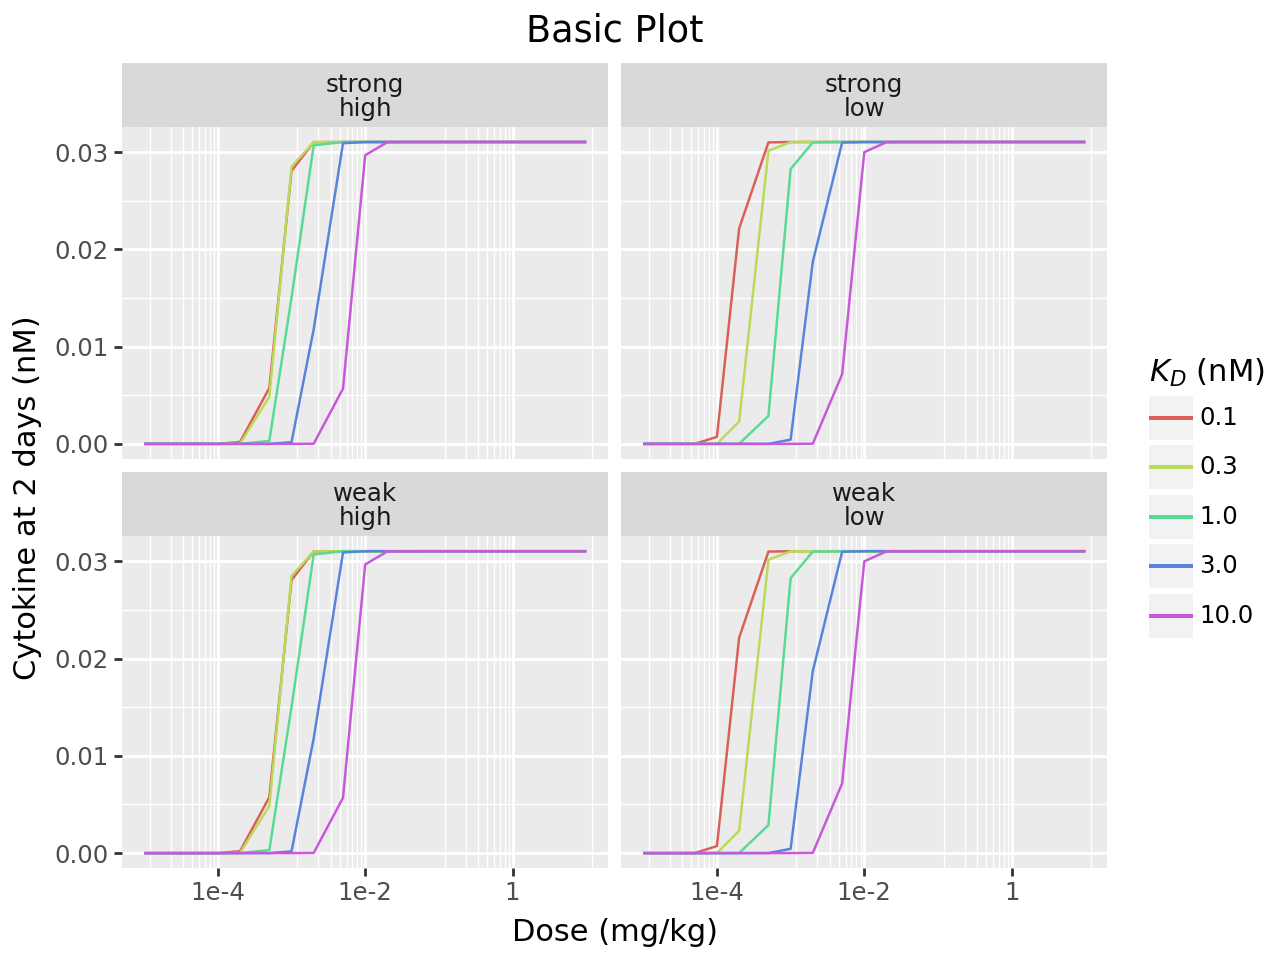

In [4]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_wrap(['binding_strength','burden'])
       + scale_x_log10()
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Basic Plot')
)

display(fig)

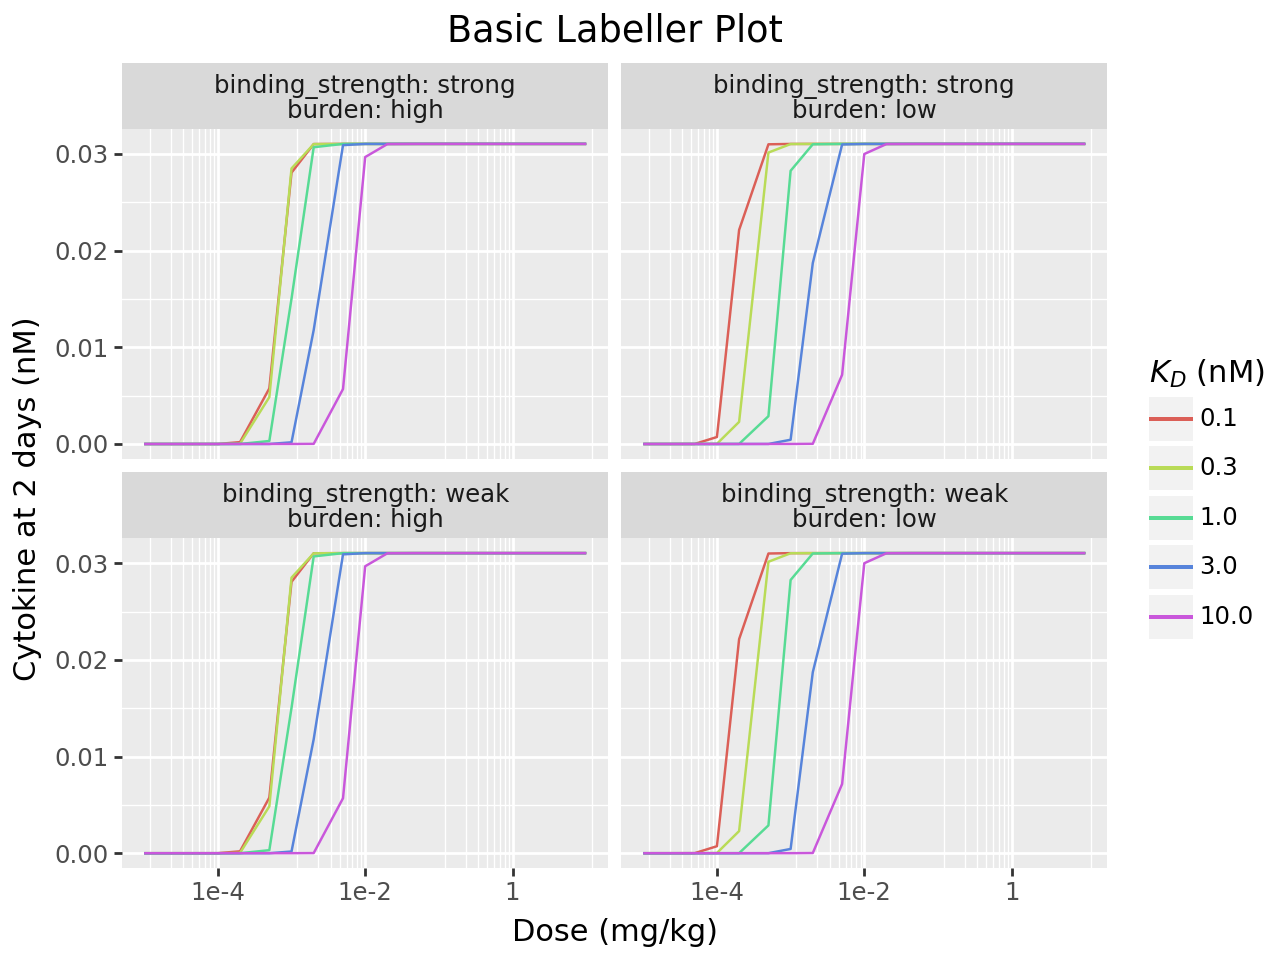

In [5]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_wrap(['binding_strength','burden'], labeller = 'label_both')
       + scale_x_log10()
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Basic Labeller Plot')
)

display(fig)

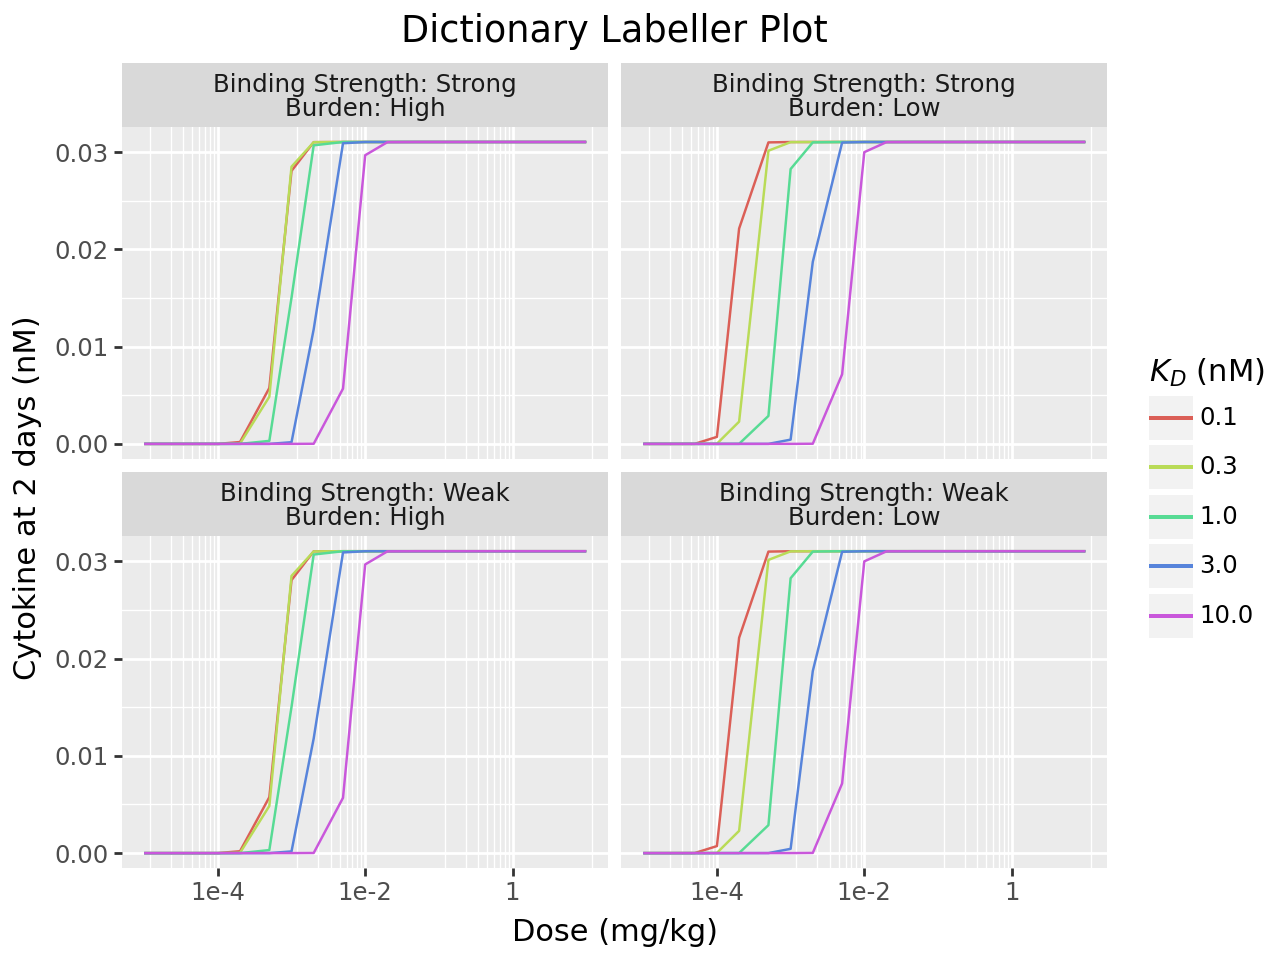

In [6]:
label_dict = {'strong':'Binding Strength: Strong',
              'weak':'Binding Strength: Weak',
              'high':'Burden: High',
              'low':'Burden: Low'}

fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_wrap(['binding_strength','burden'], labeller = label_dict)
       + scale_x_log10()
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Dictionary Labeller Plot')
)

display(fig)

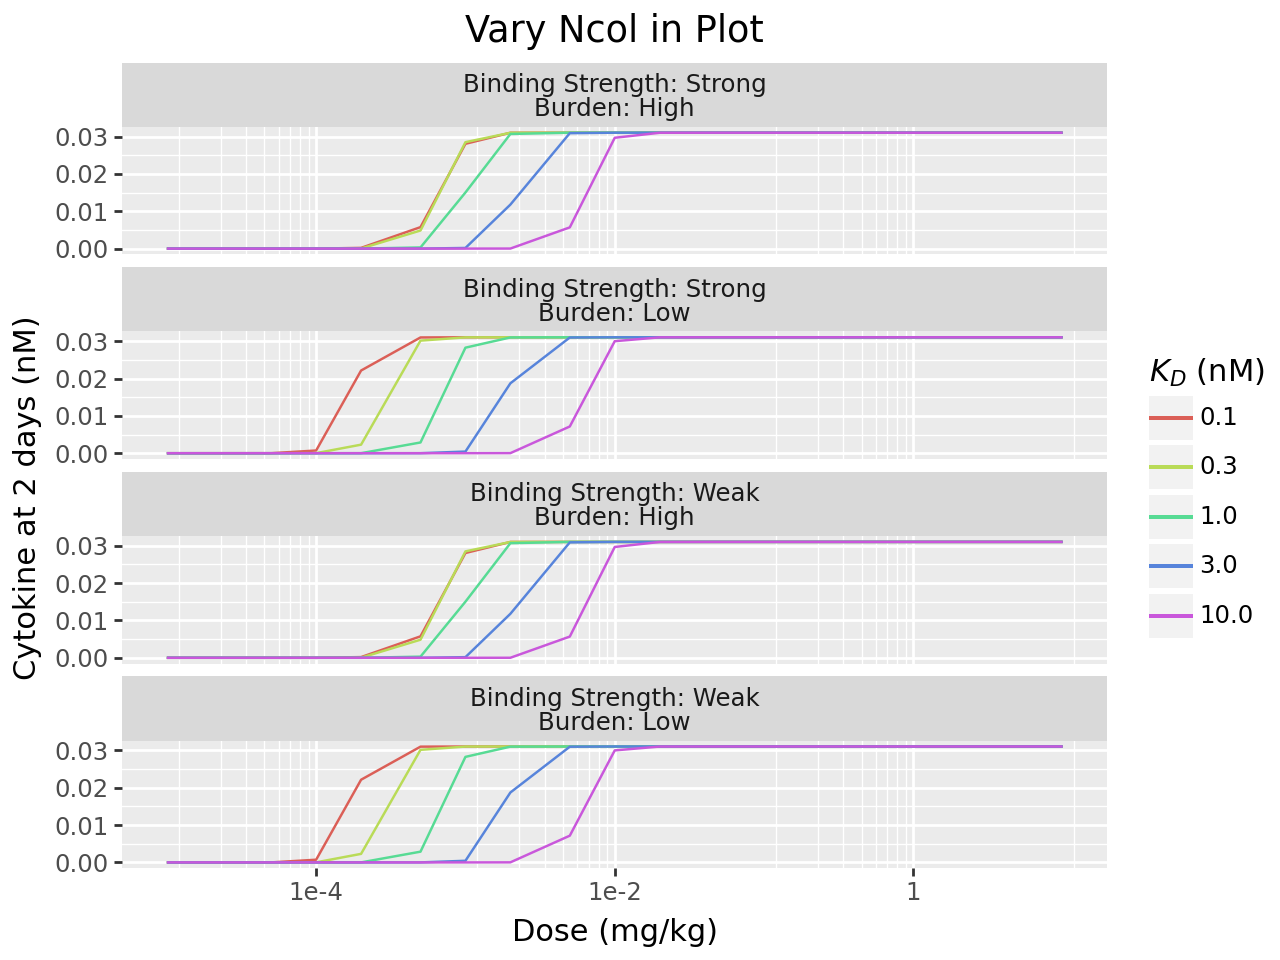

In [7]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_wrap(['binding_strength', 'burden'], labeller = label_dict, ncol = 1)
       + scale_x_log10()
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Vary Ncol in Plot')
)

display(fig)

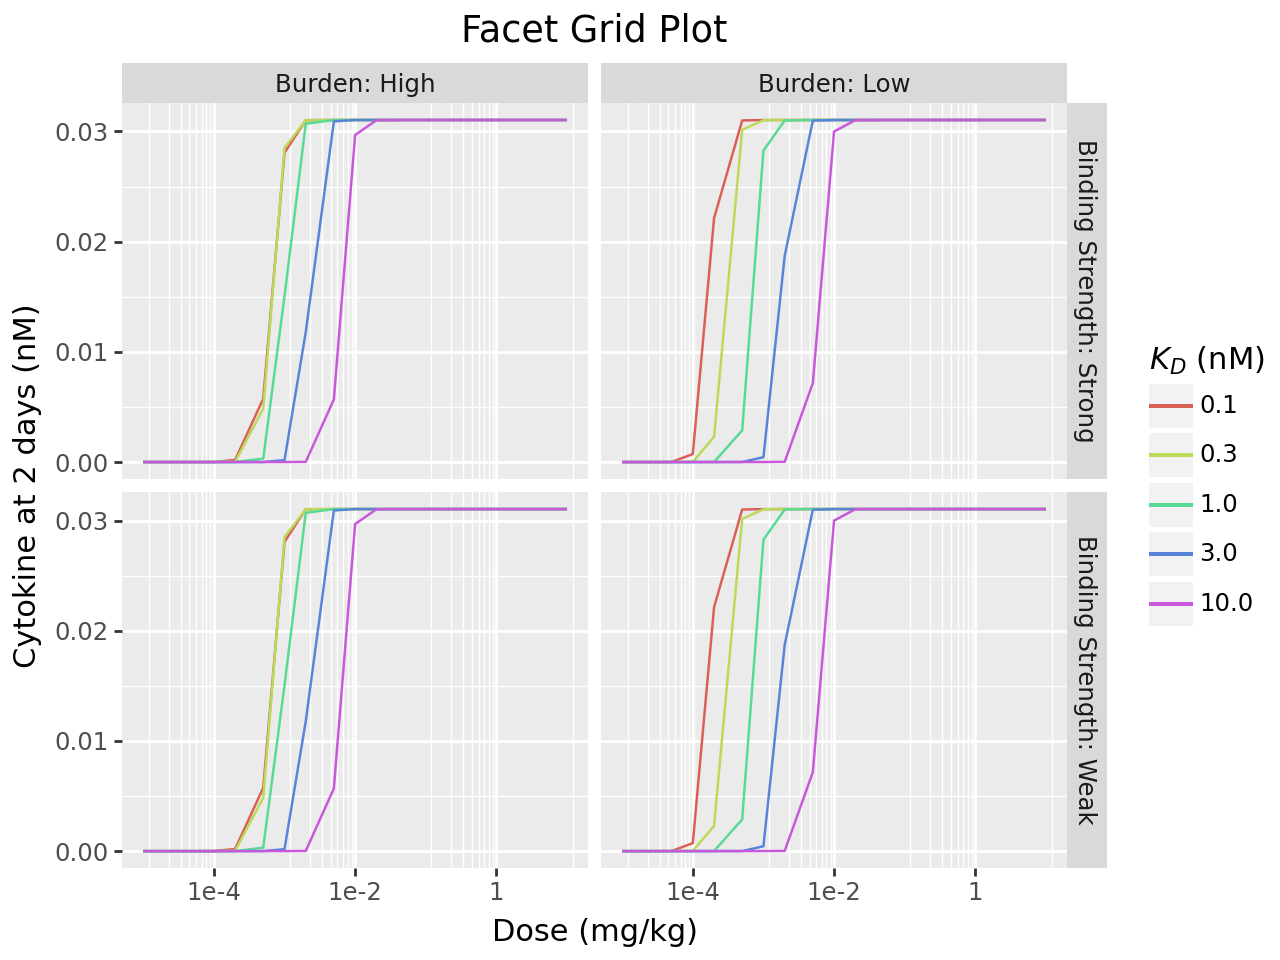

In [8]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10()
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Facet Grid Plot')
)

display(fig)

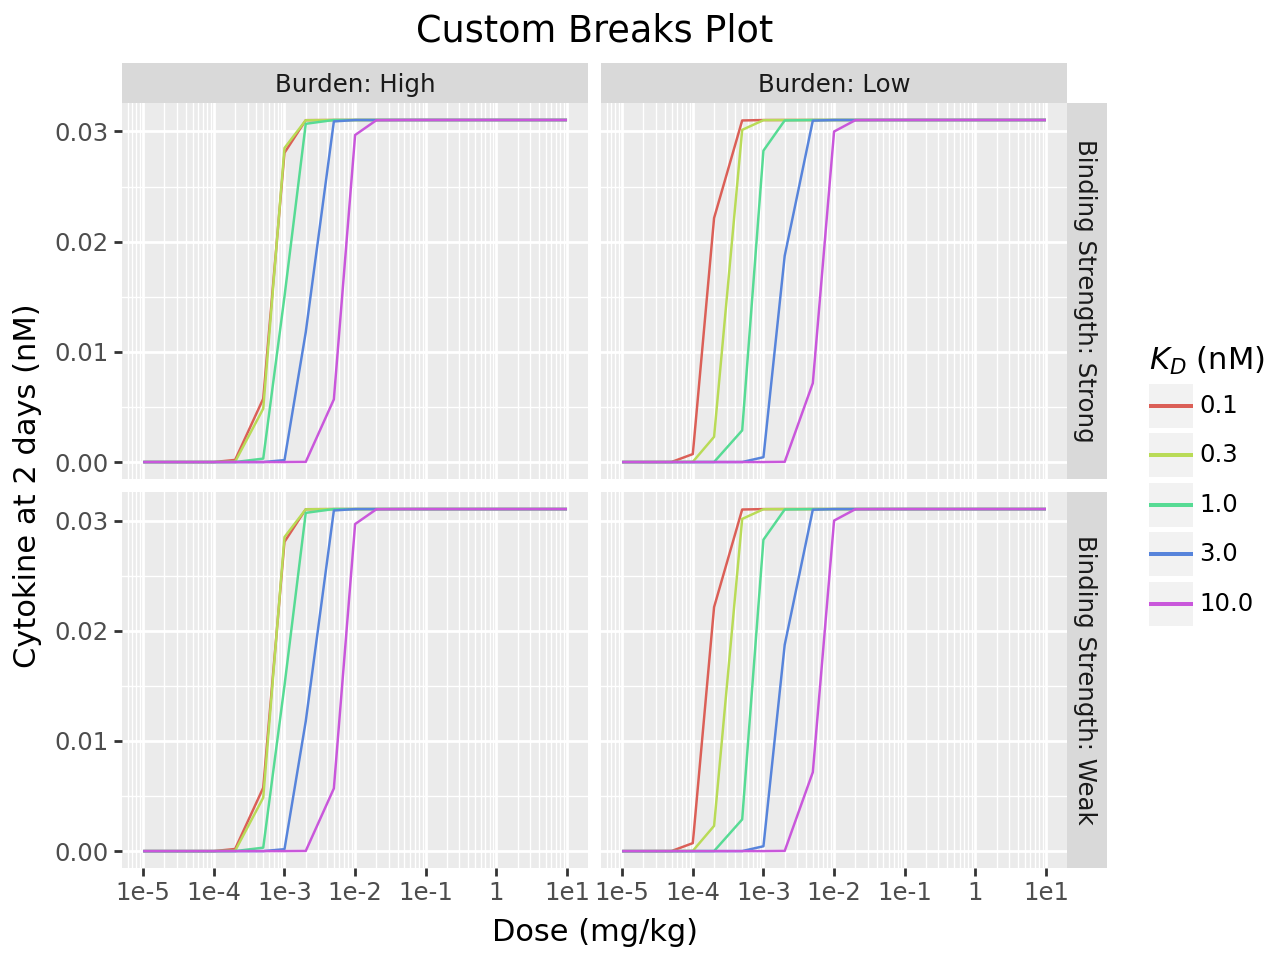

In [9]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme()
       + ggtitle('Custom Breaks Plot')
)

display(fig)

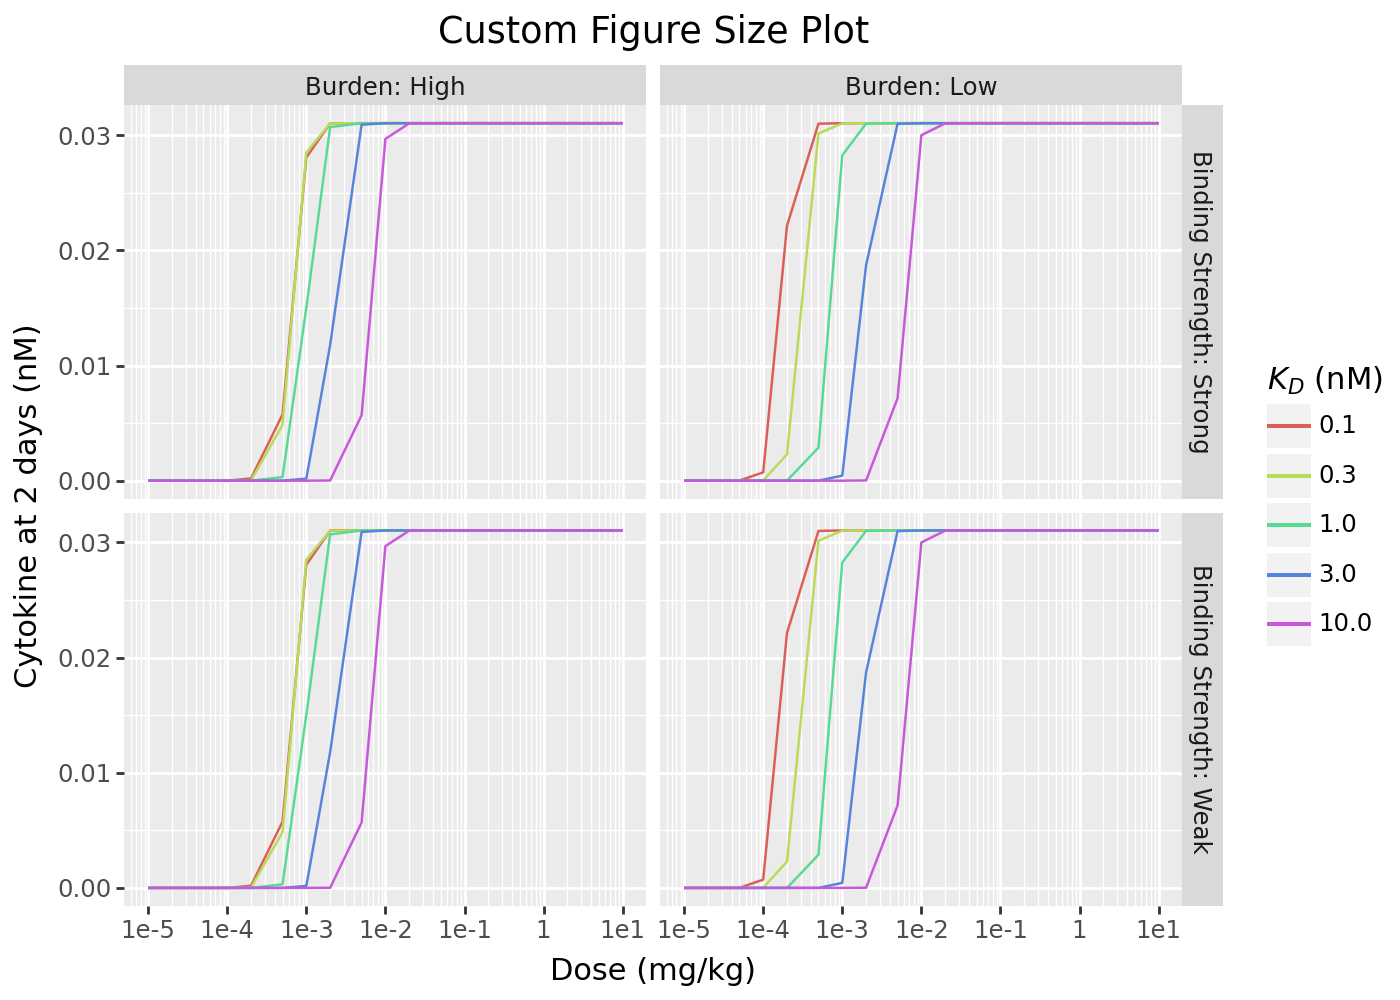

In [10]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(figure_size = (7, 5))
       + ggtitle('Custom Figure Size Plot')
)

display(fig)

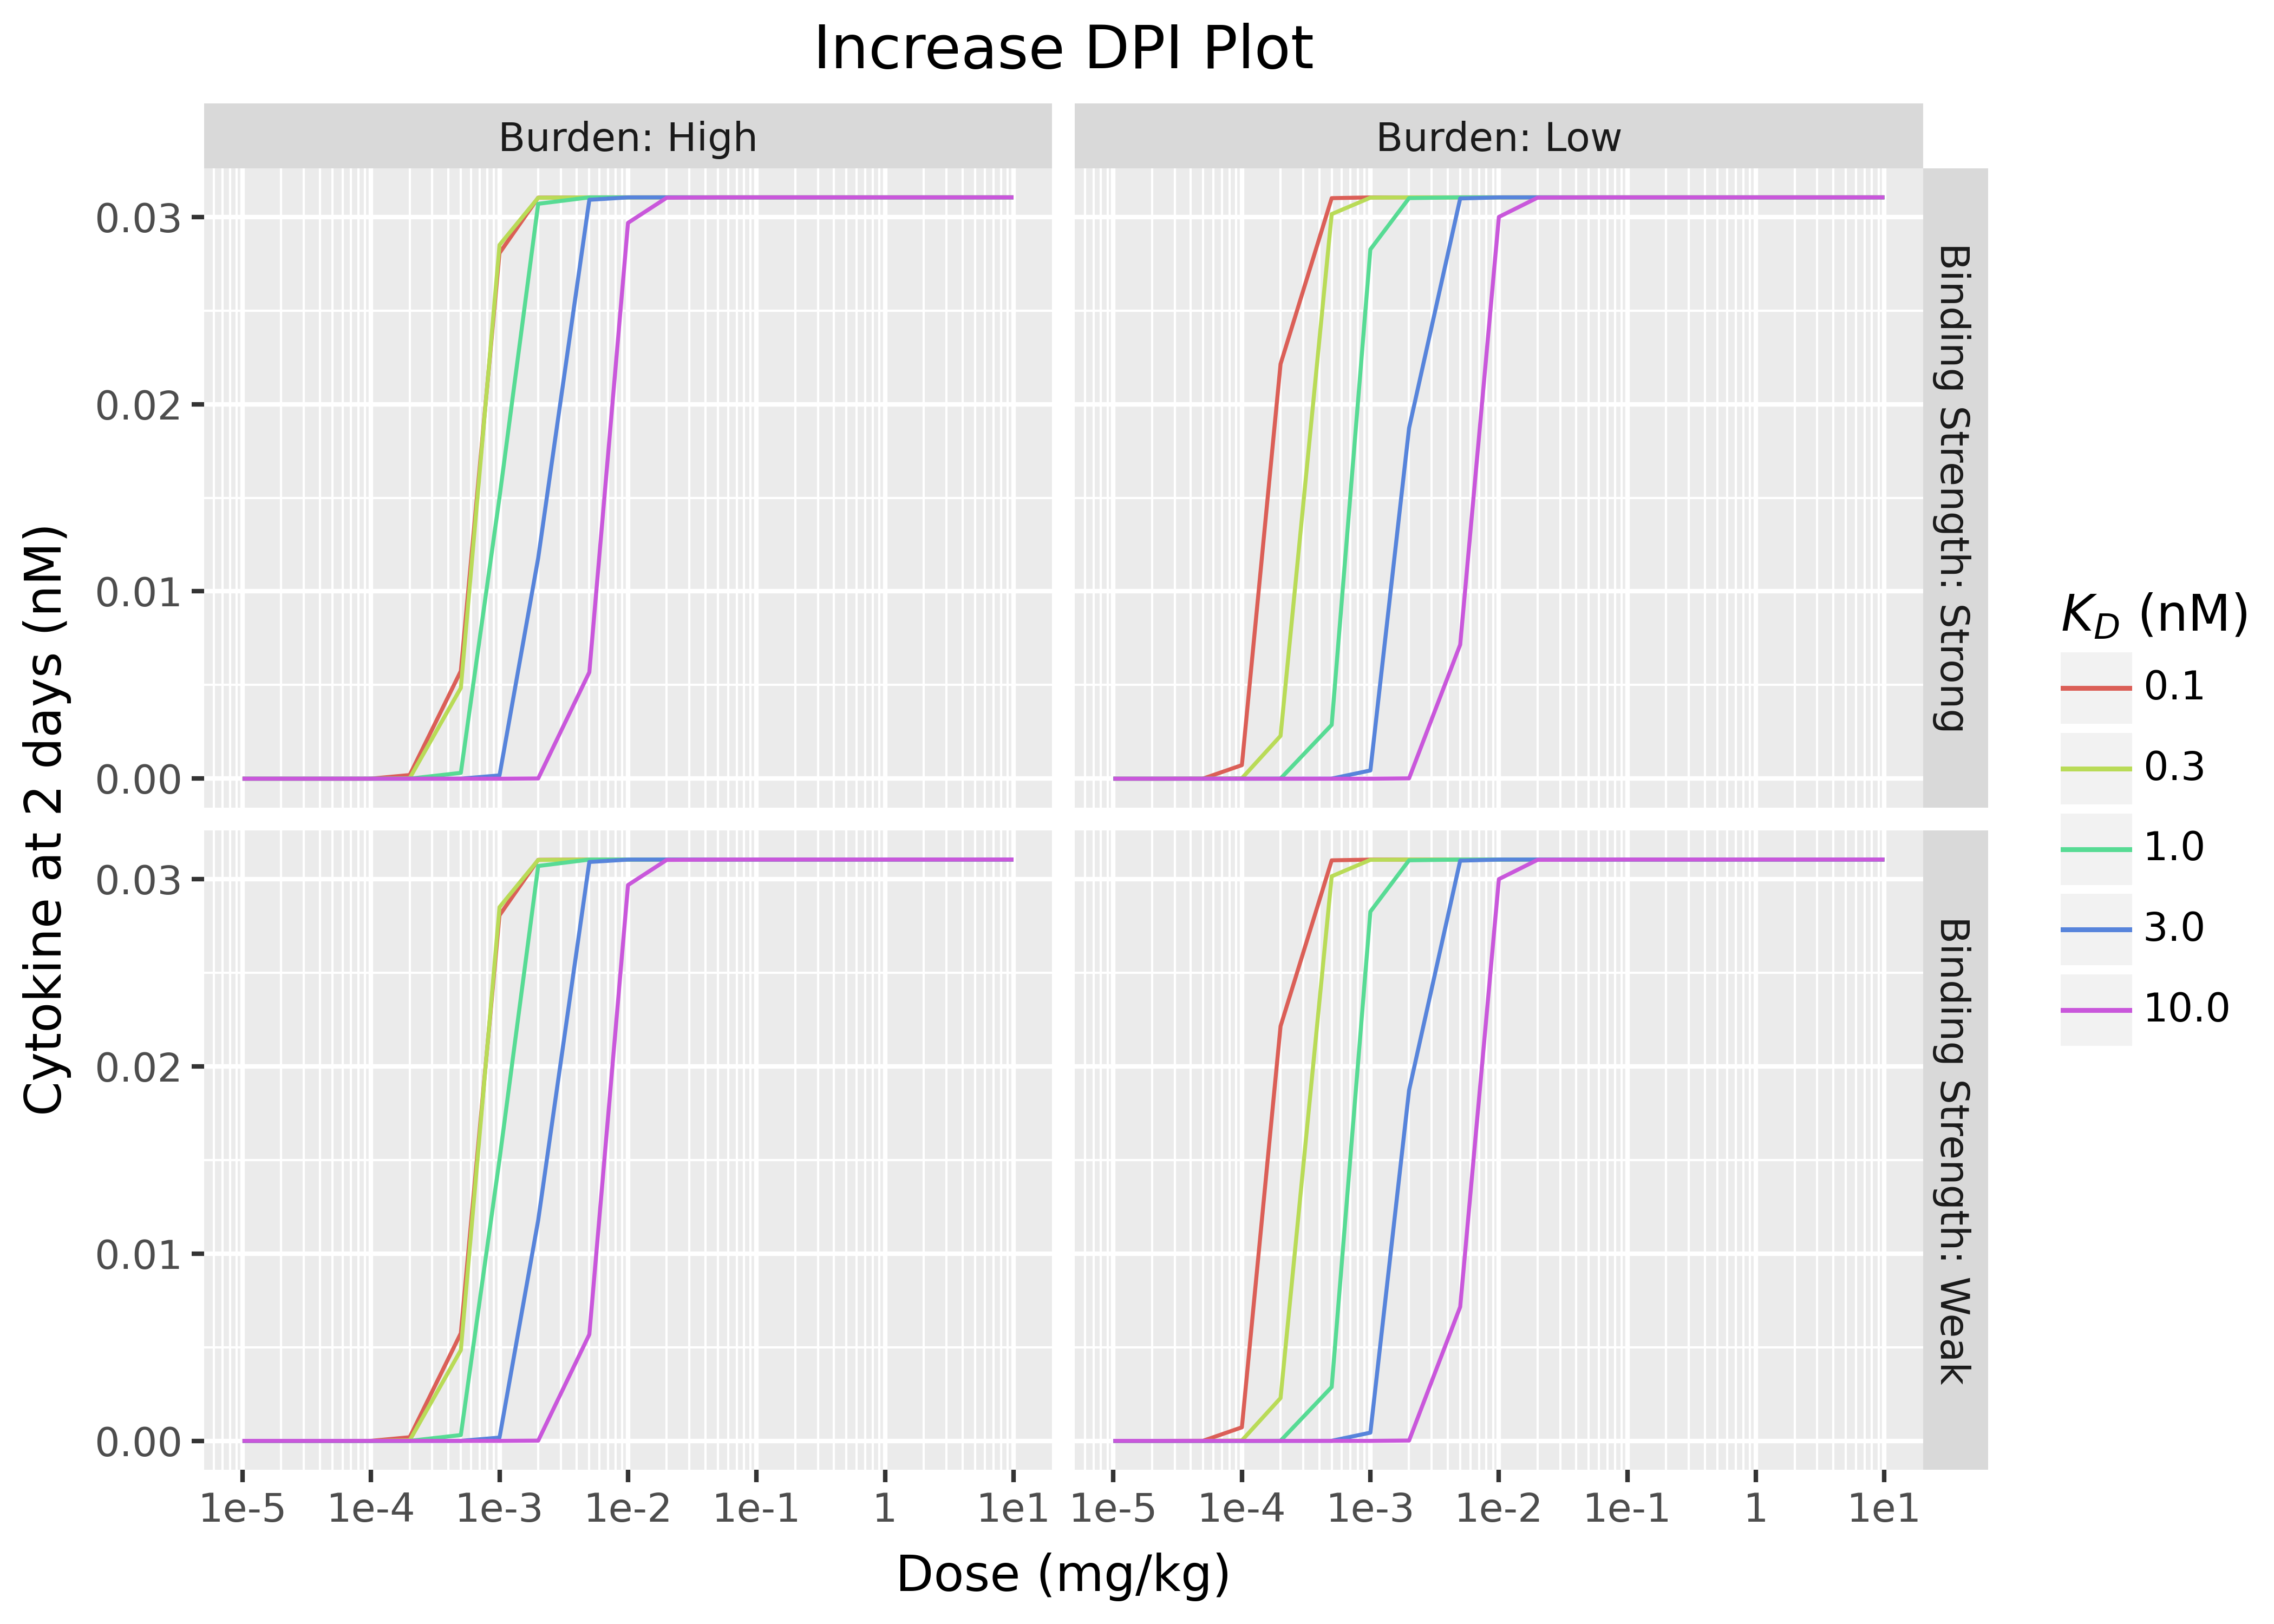

In [11]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(figure_size = (7, 5), dpi = 300)
       + ggtitle('Increase DPI Plot')
)

display(fig)

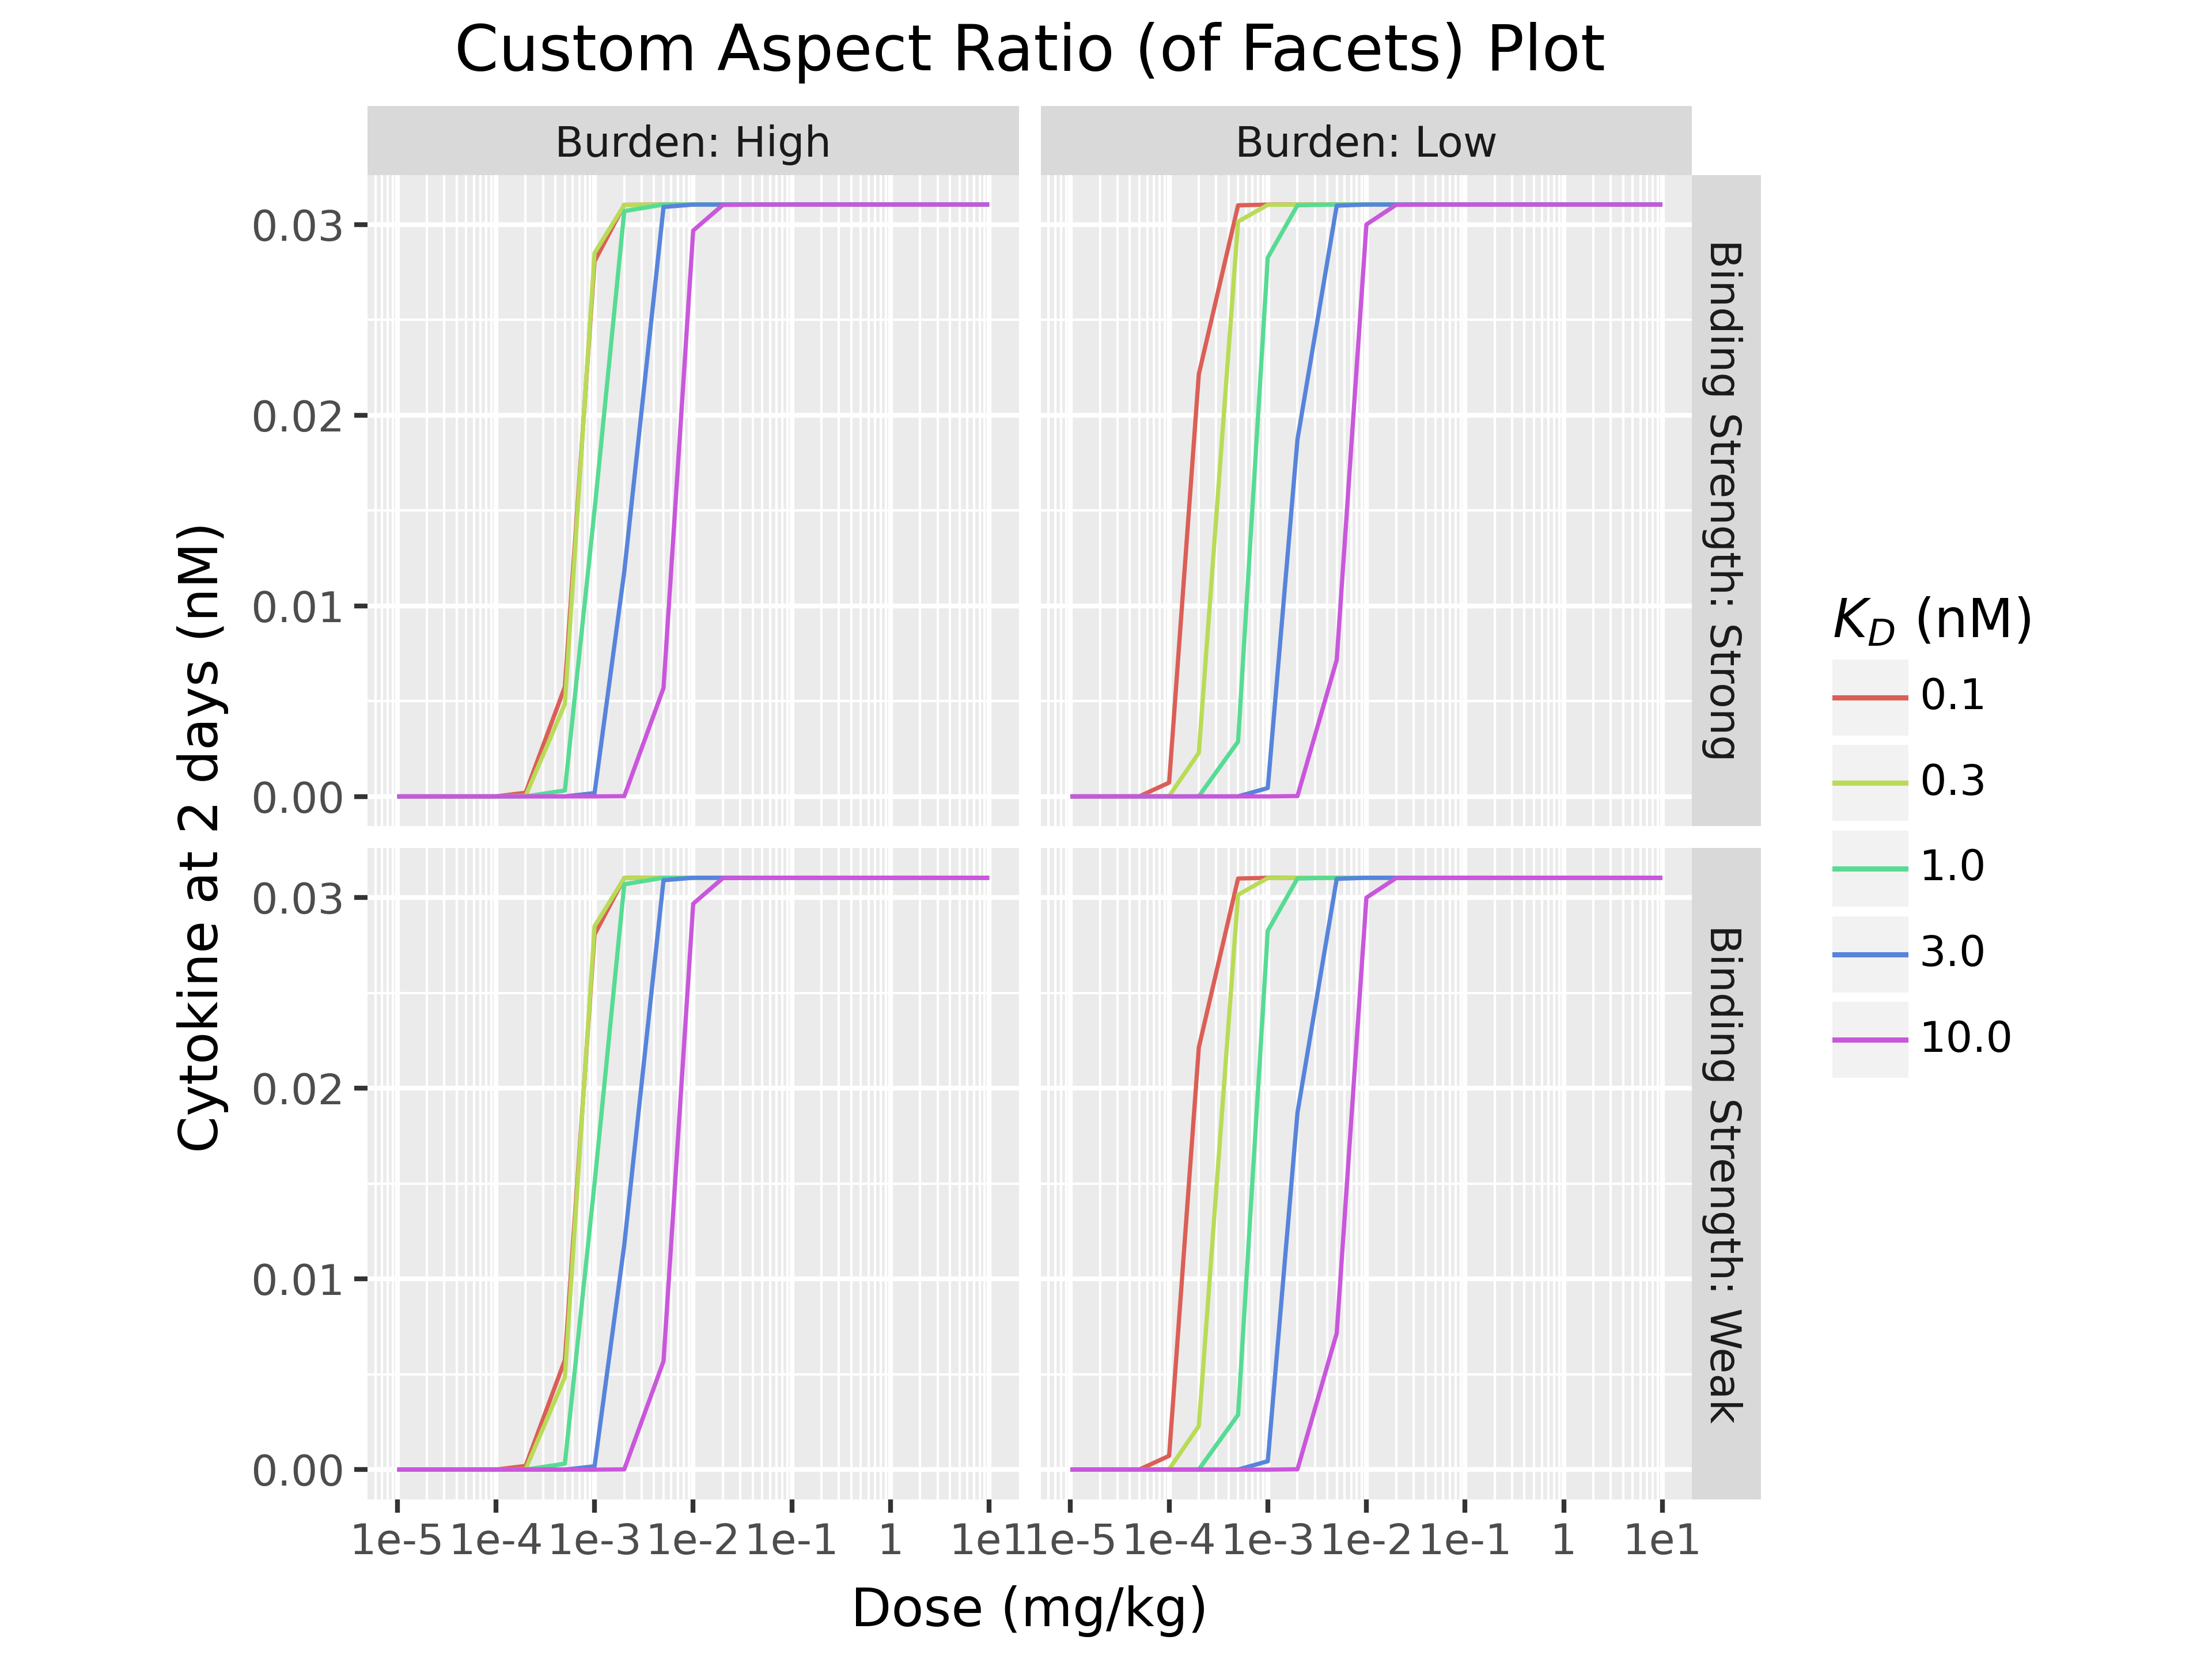

In [12]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300)
       + ggtitle('Custom Aspect Ratio (of Facets) Plot')
)

display(fig)

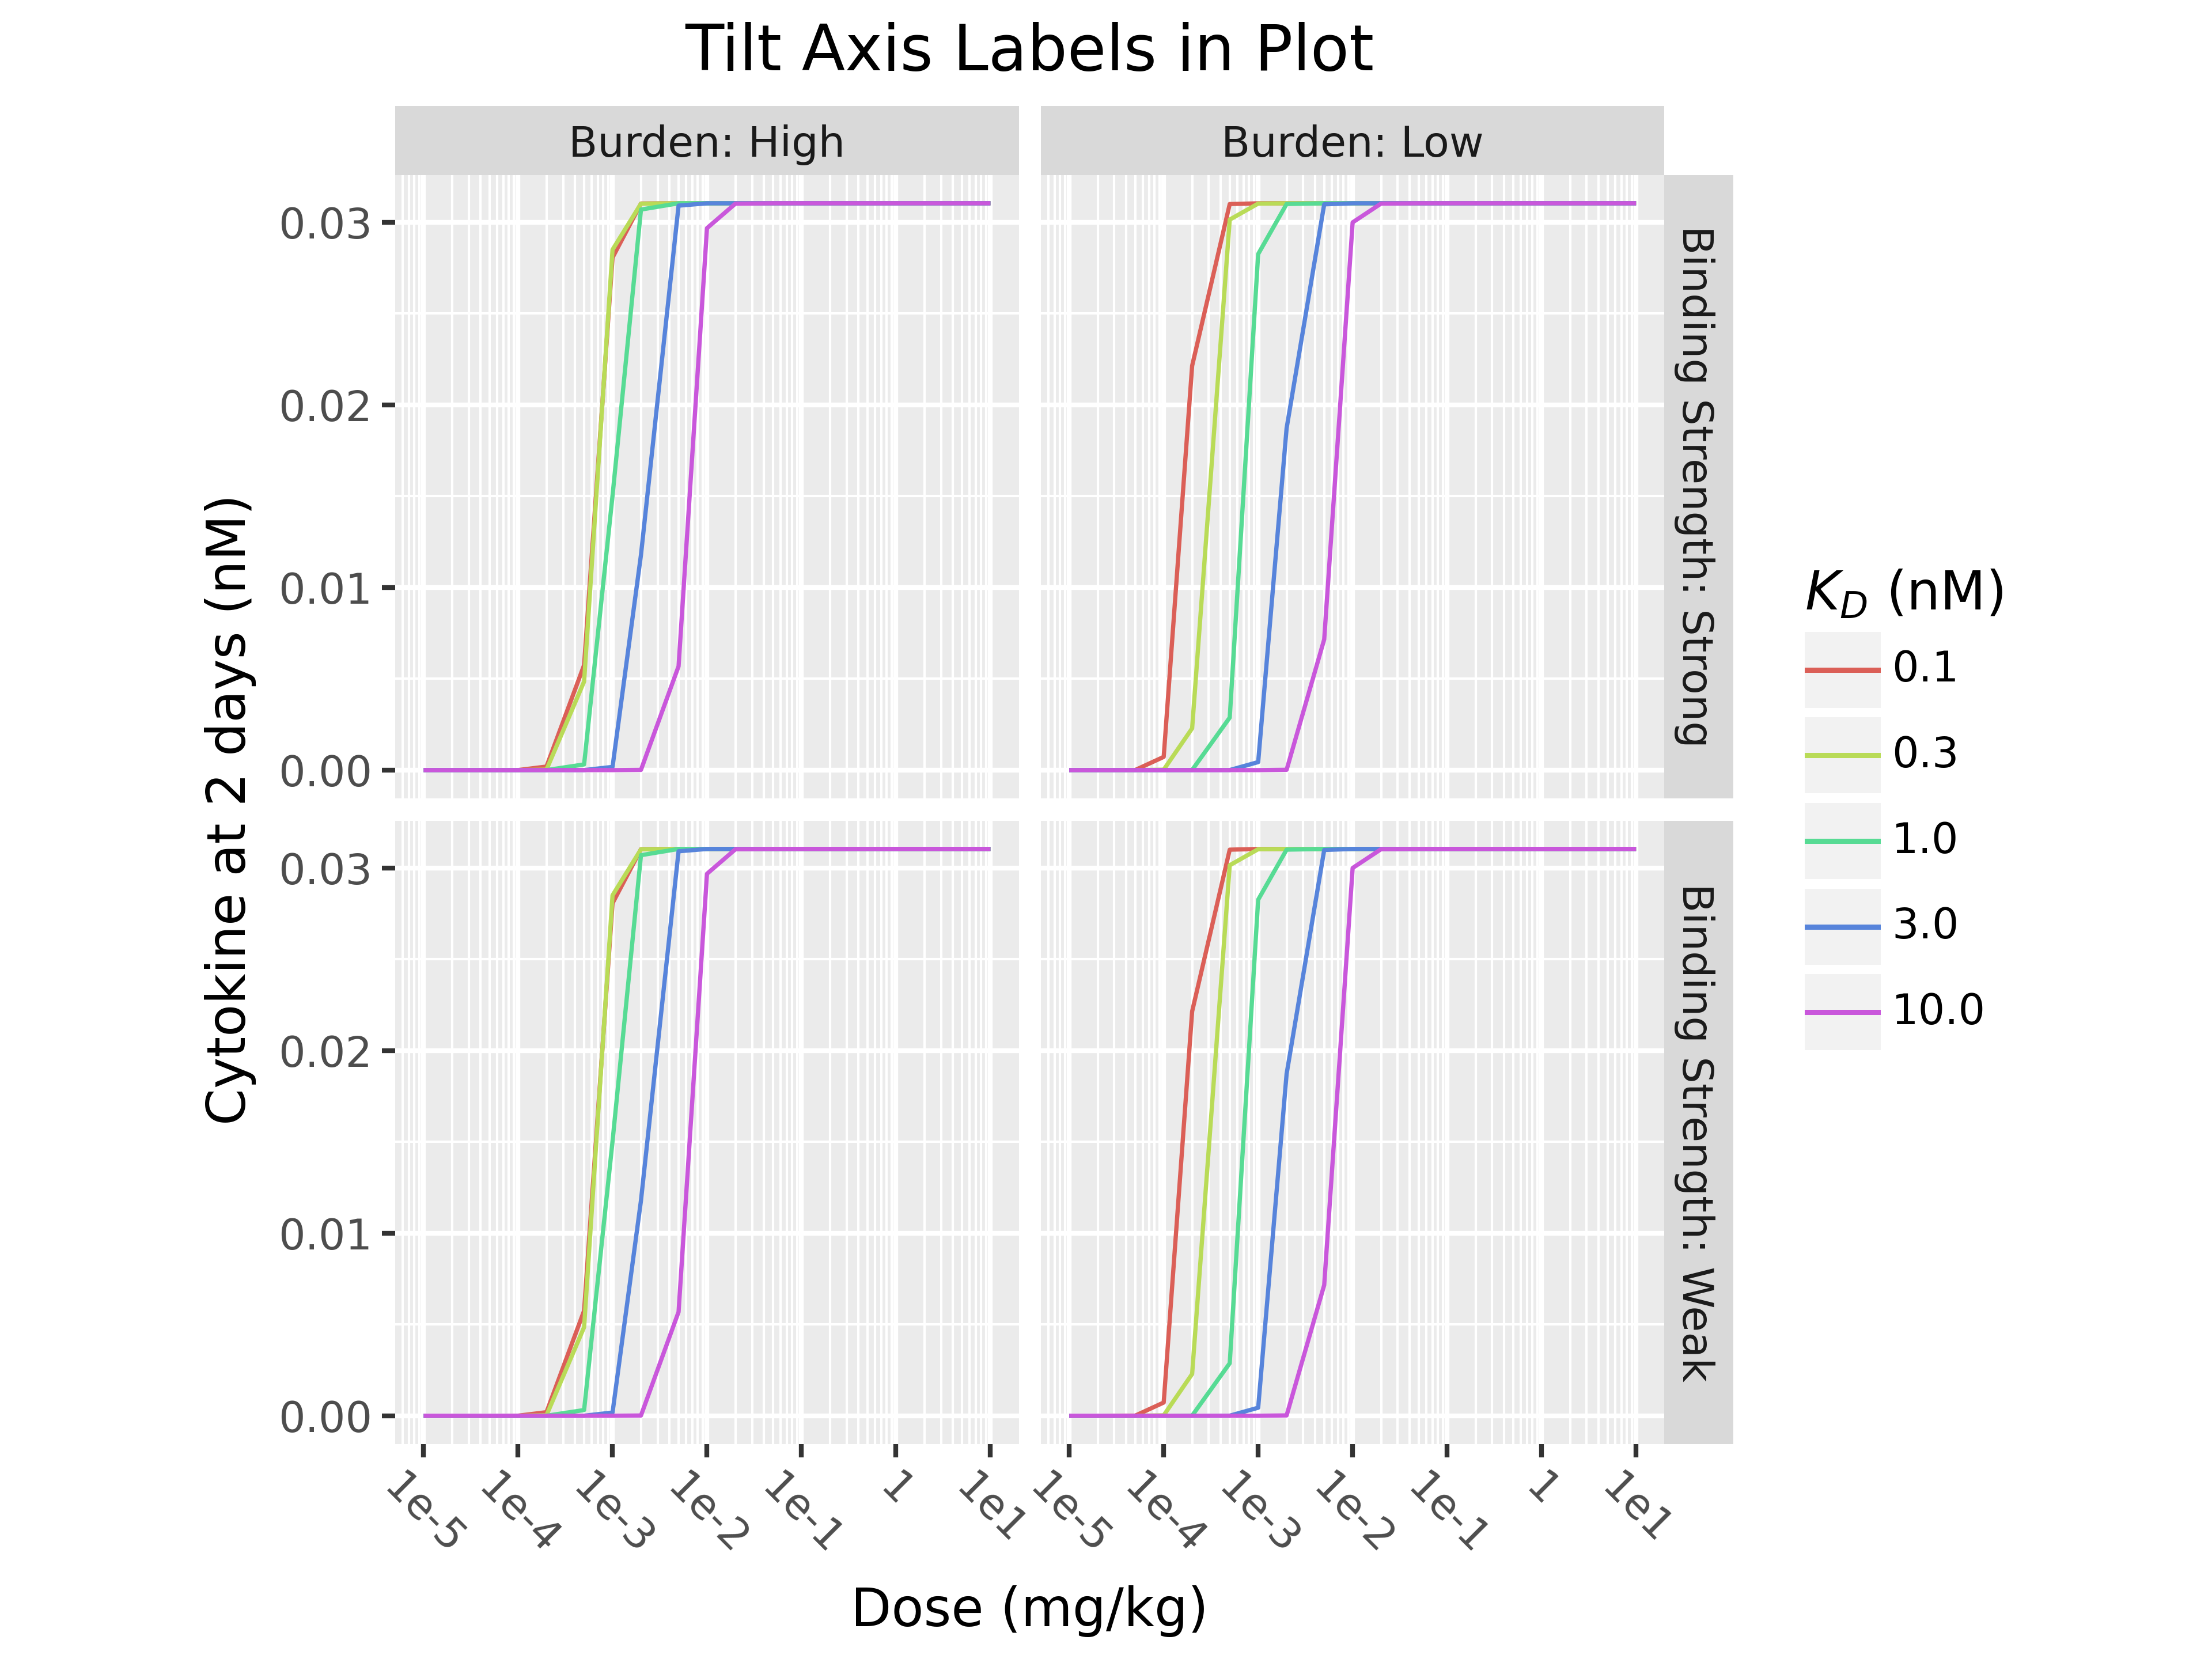

In [13]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300, axis_text_x=element_text(rotation=-45))
       + ggtitle('Tilt Axis Labels in Plot')
)

display(fig)

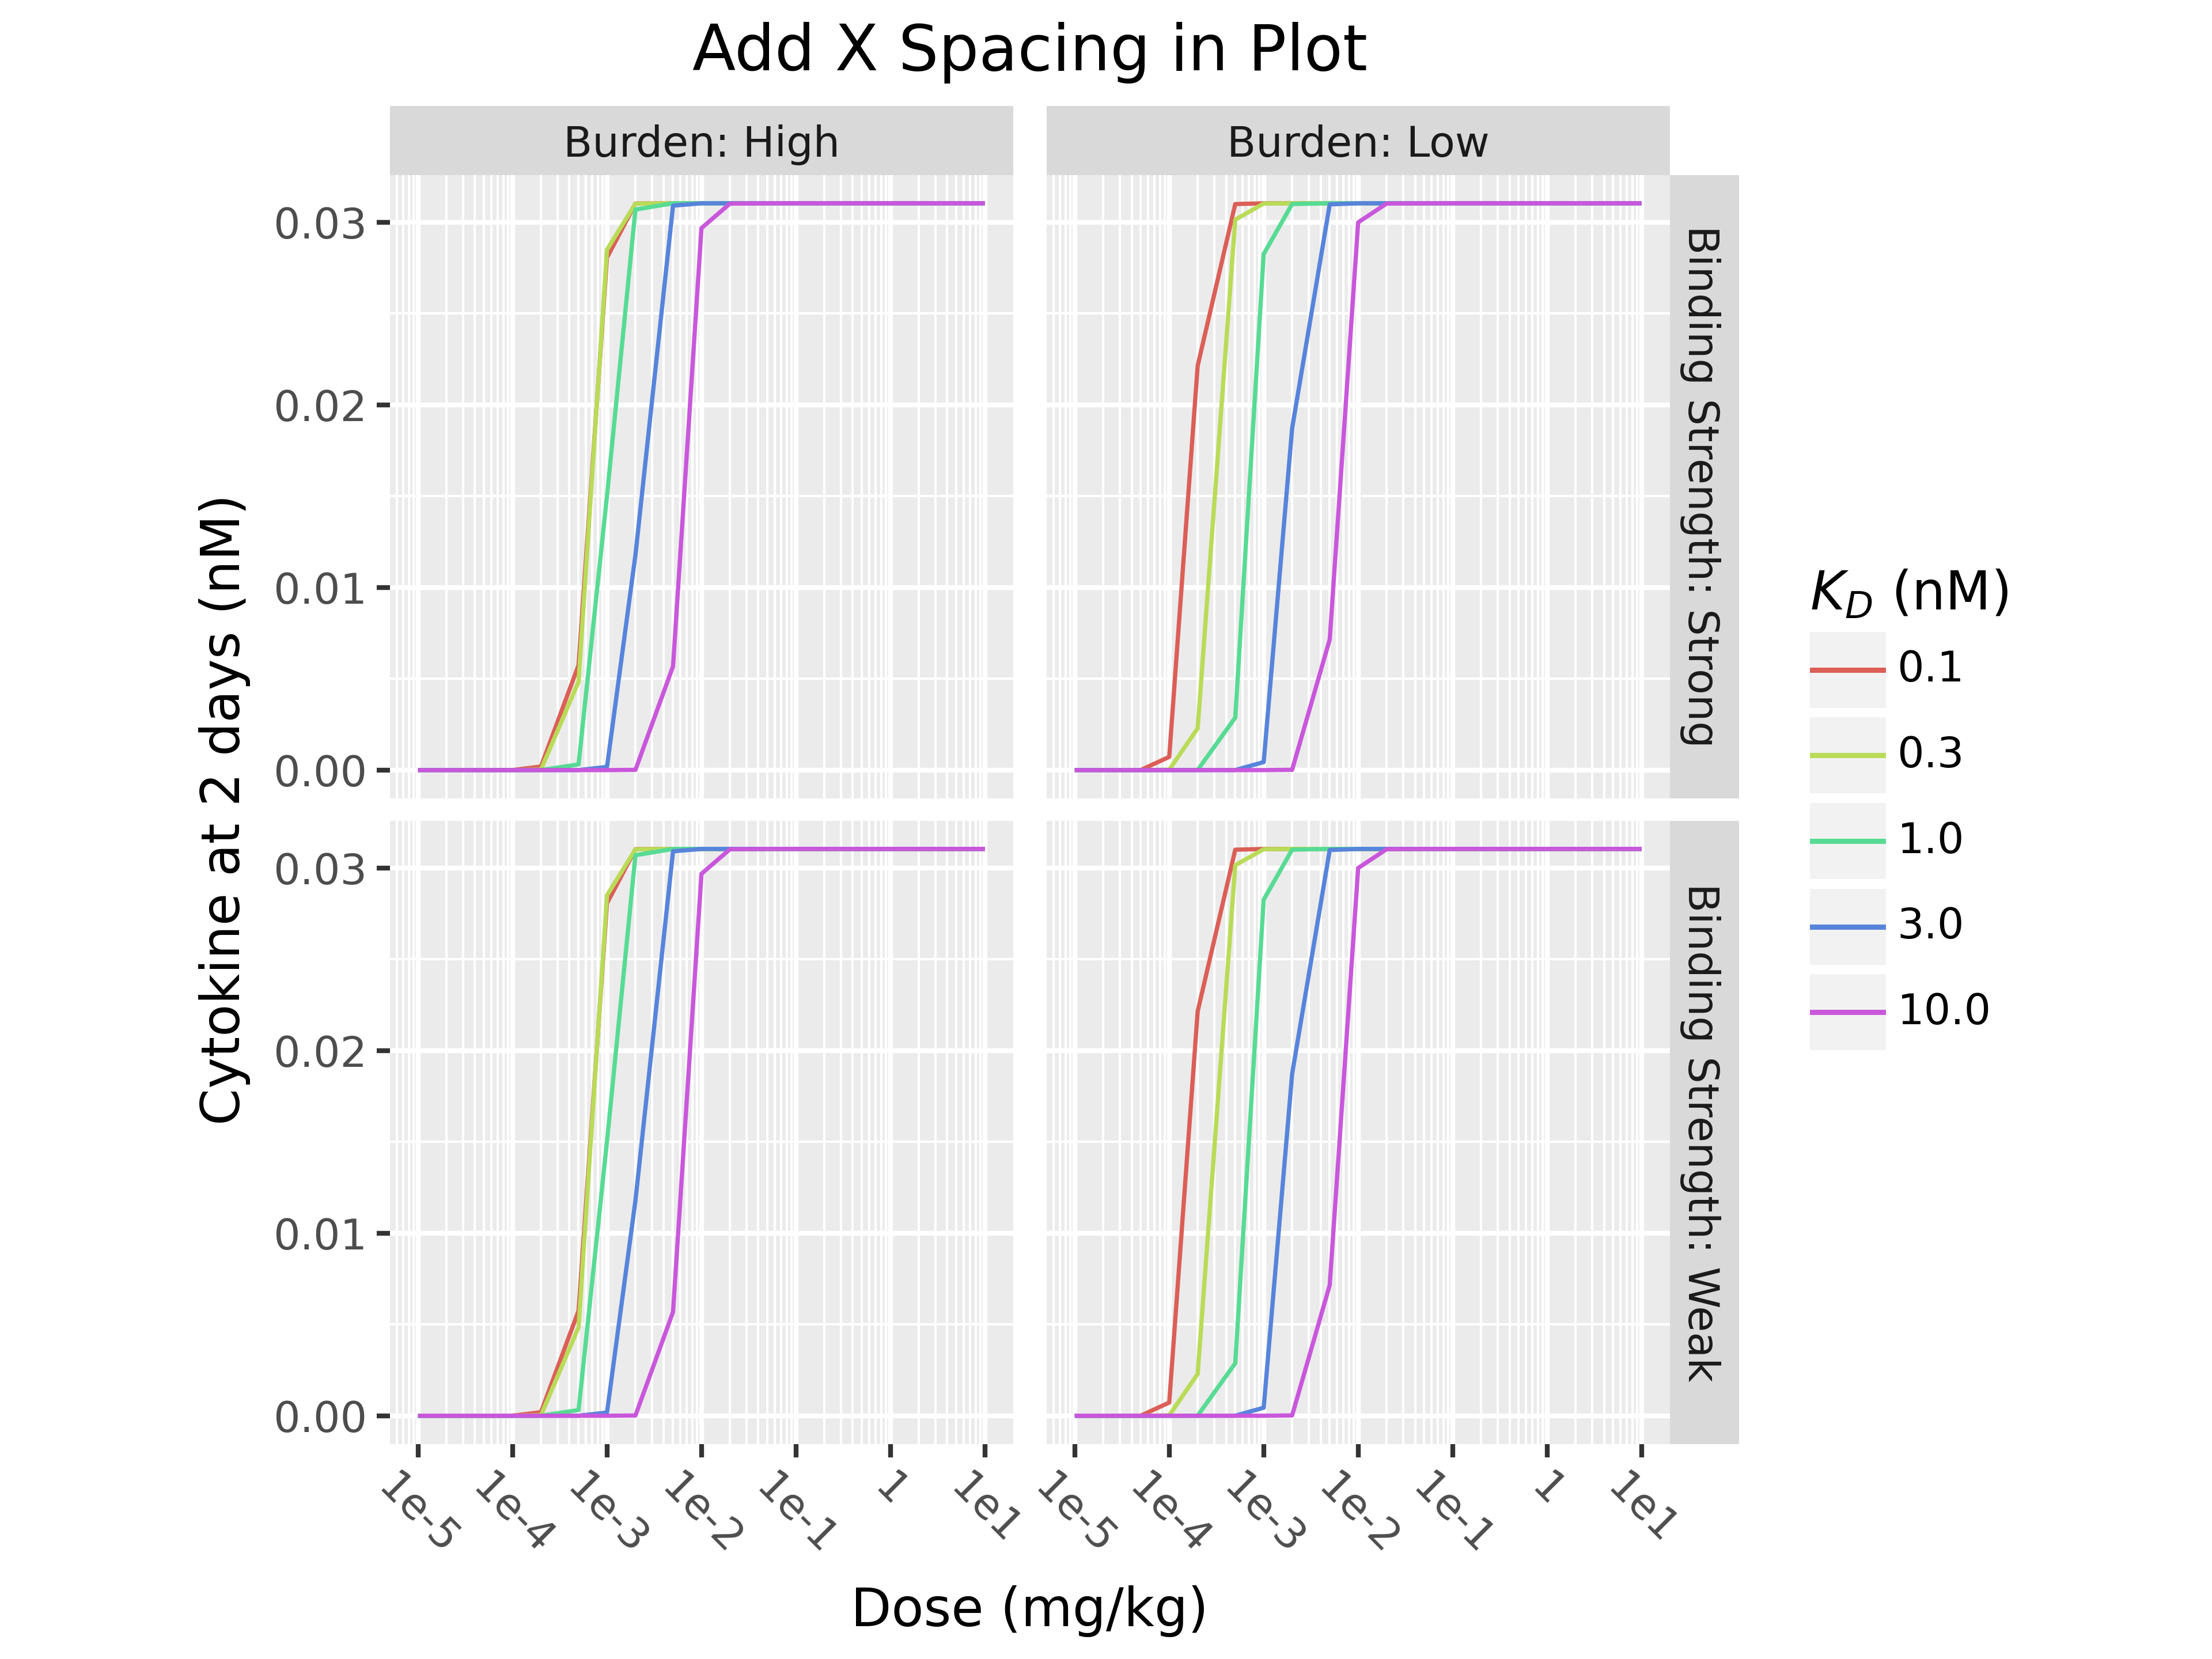

In [14]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300, axis_text_x=element_text(rotation=-45), panel_spacing_x = 0.015)
       + ggtitle('Add X Spacing in Plot')
)

display(fig)

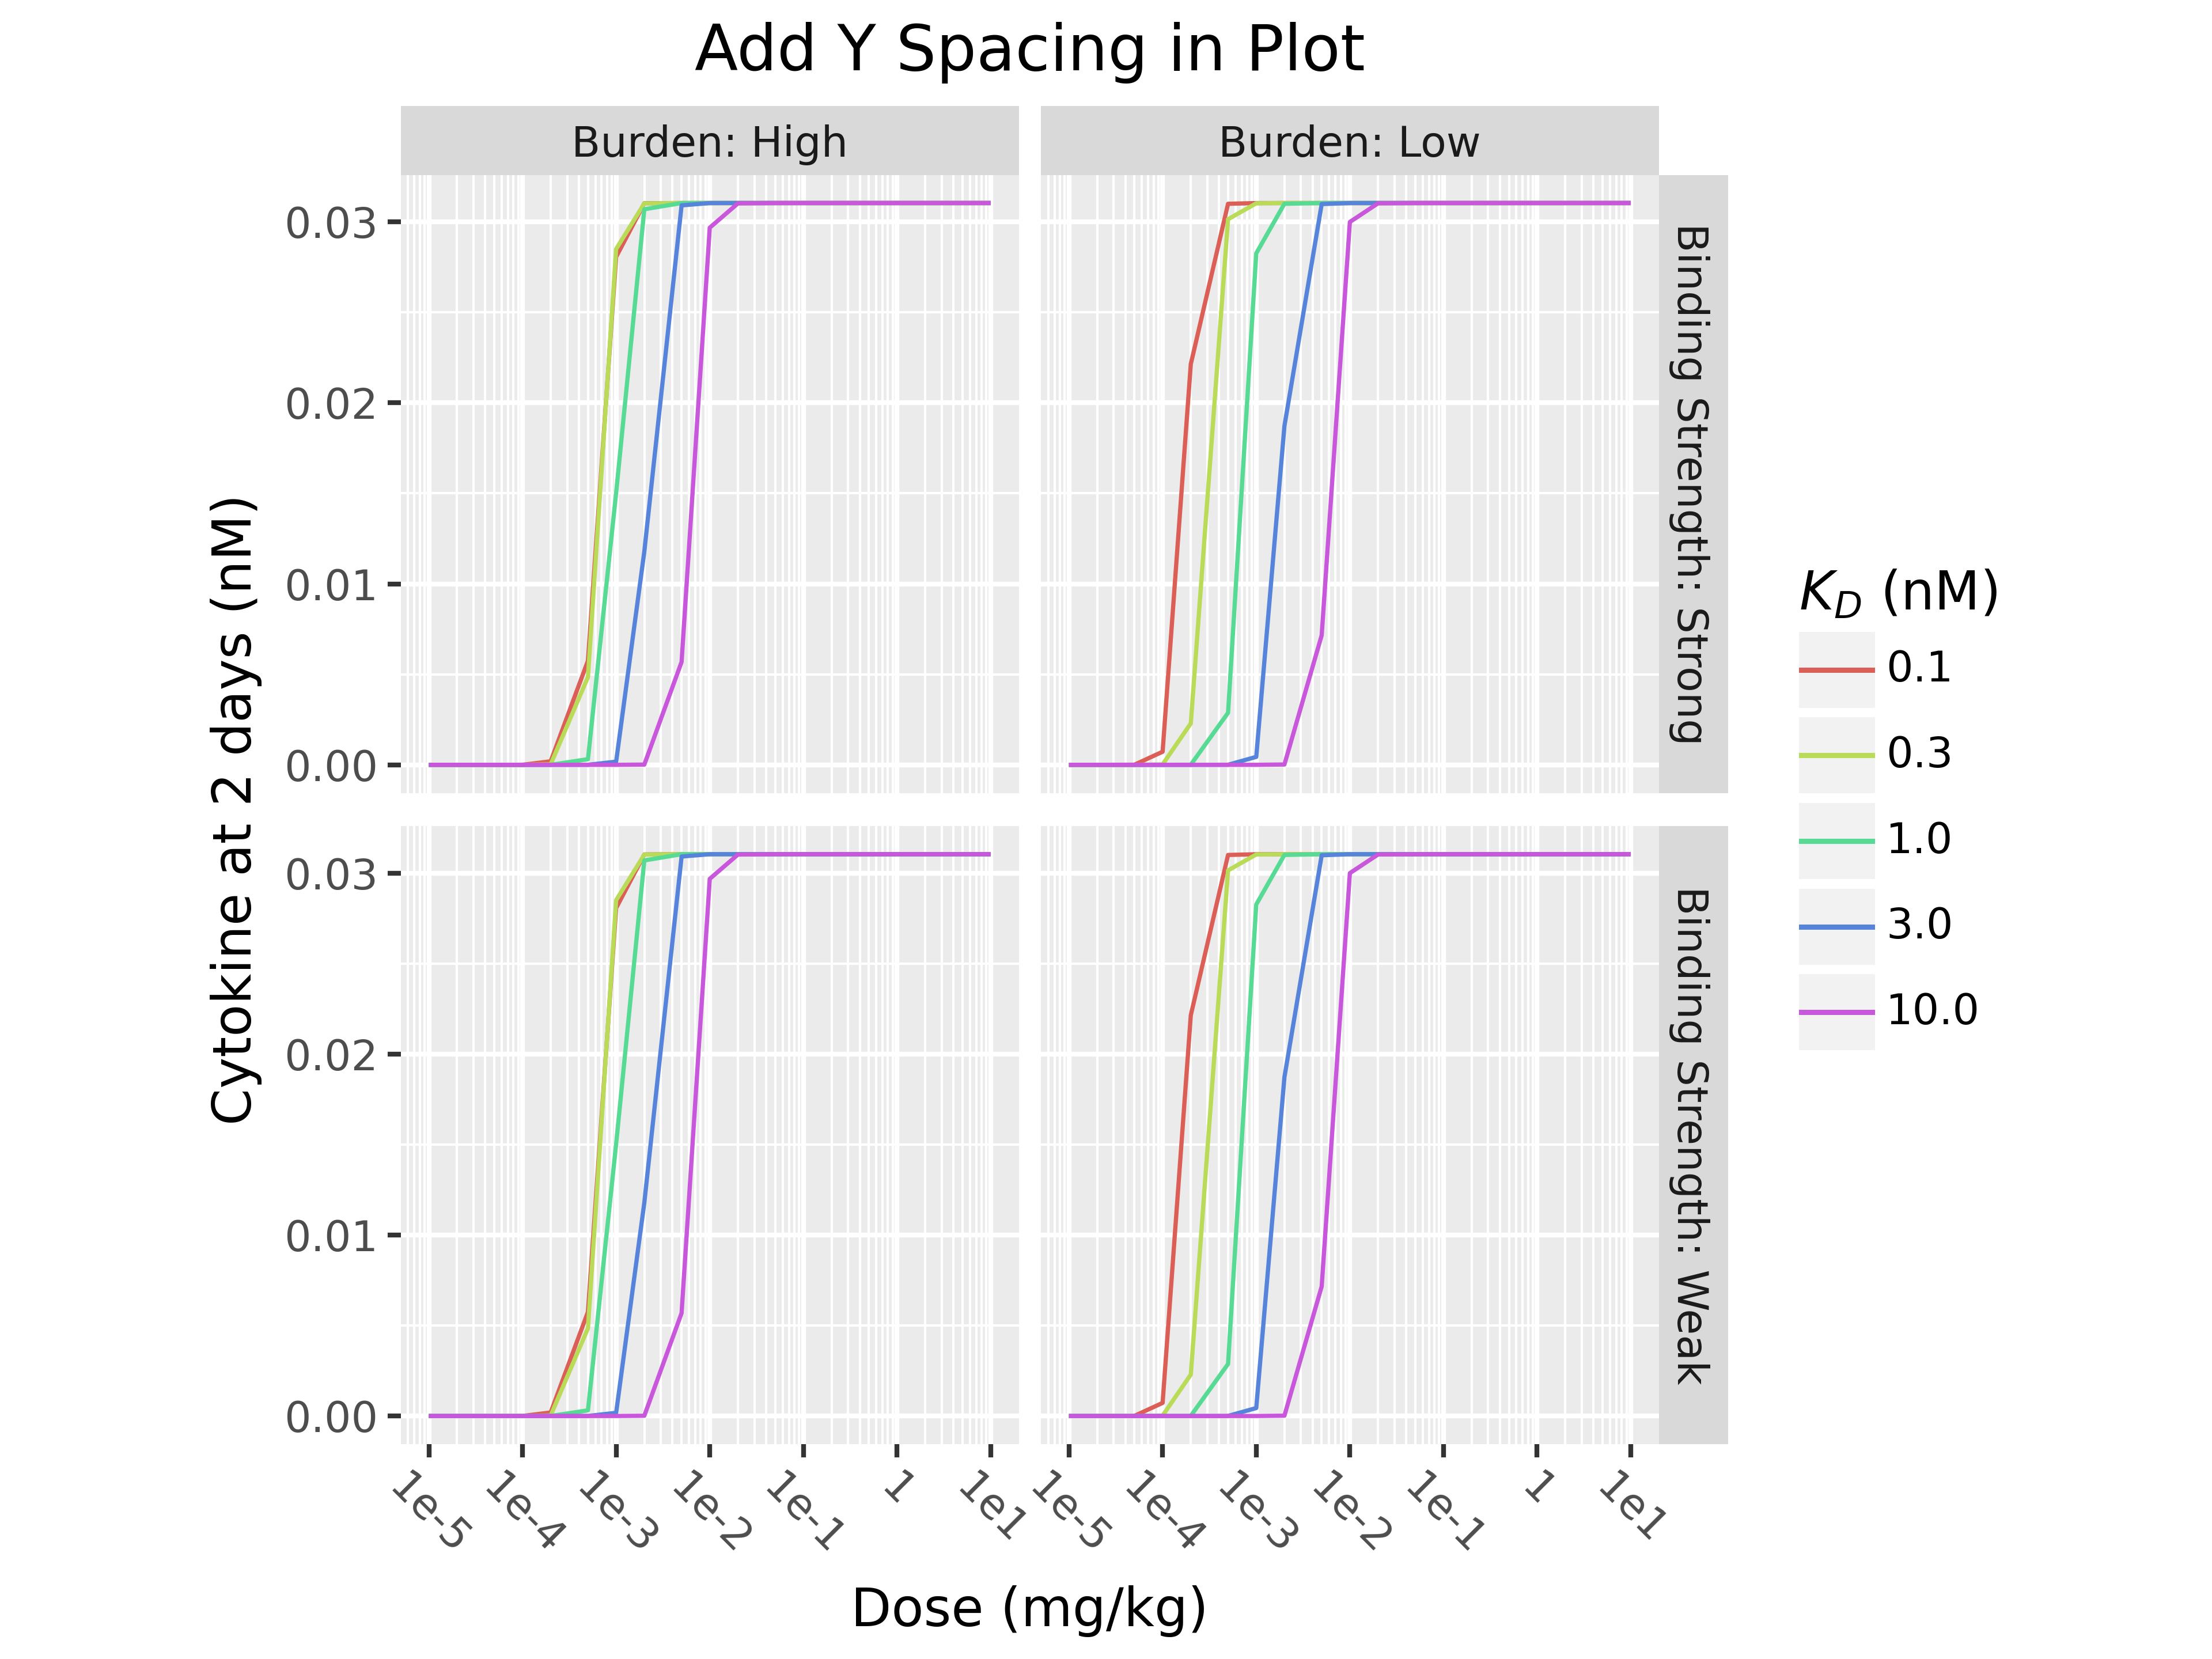

In [15]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300, axis_text_x=element_text(rotation=-45), panel_spacing_y = 0.015)
       + ggtitle('Add Y Spacing in Plot')
)

display(fig)

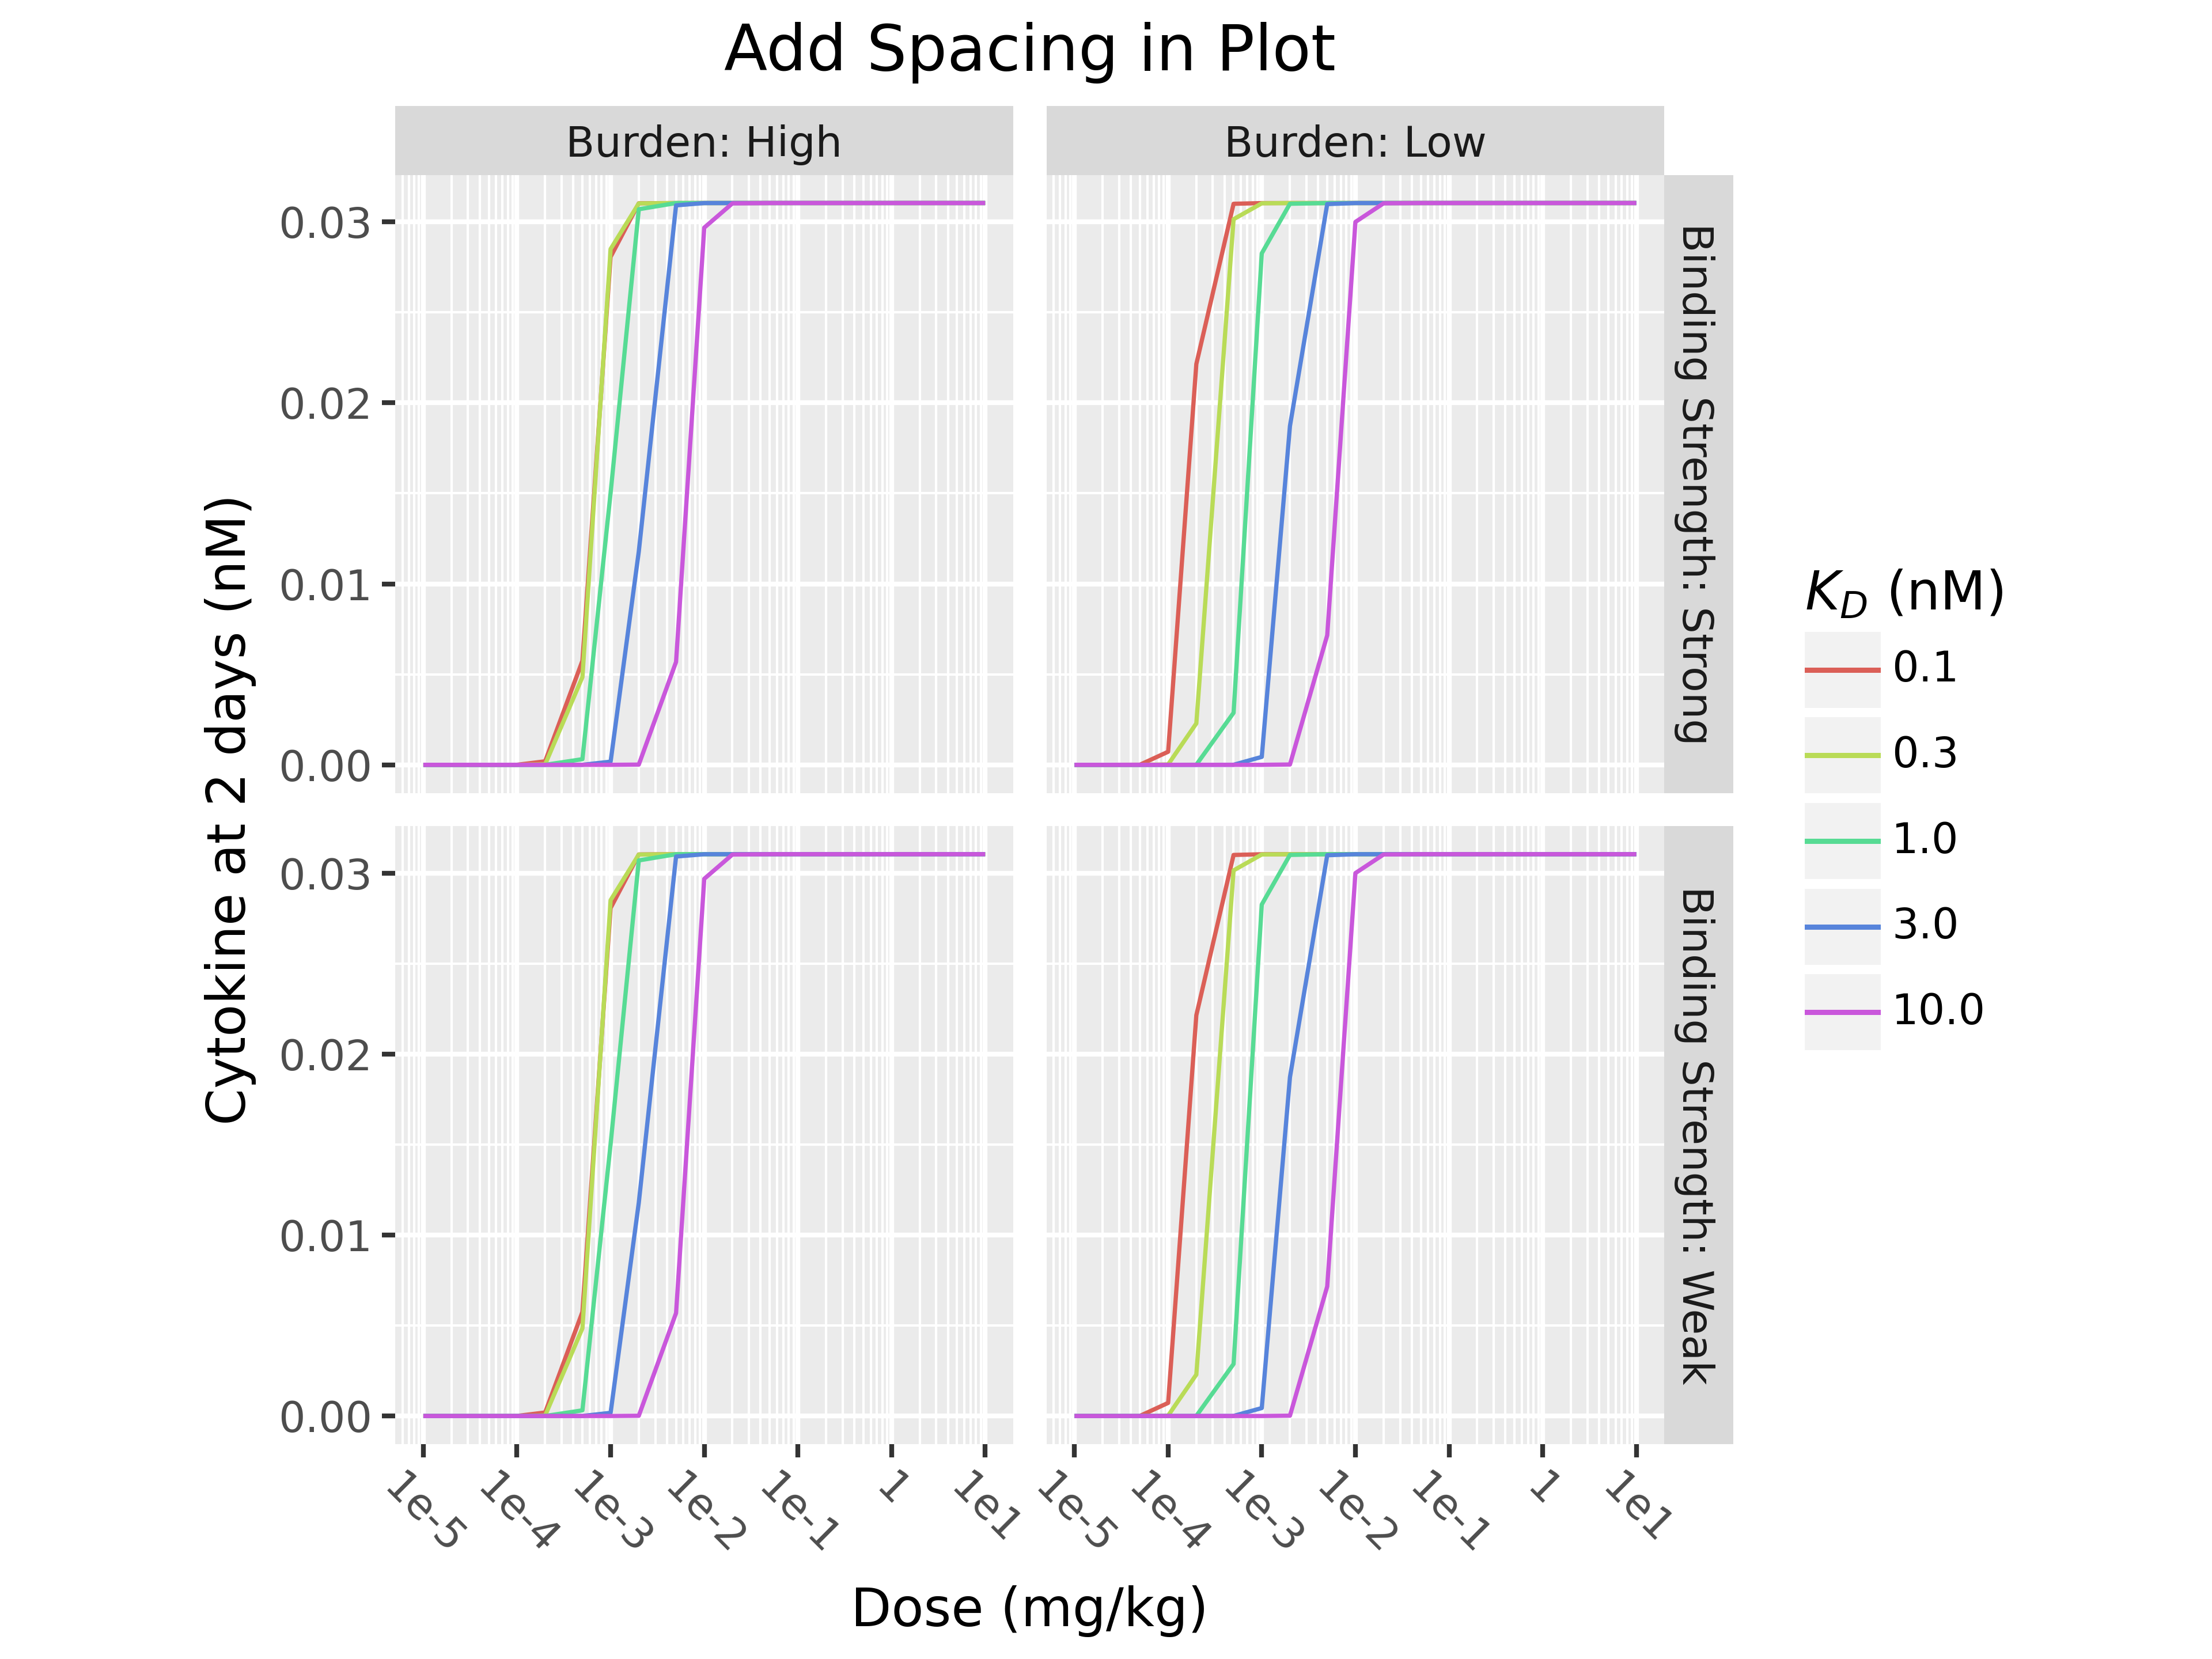

In [16]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300, axis_text_x=element_text(rotation=-45), panel_spacing = 0.015)
       + ggtitle('Add Spacing in Plot')
)

display(fig)

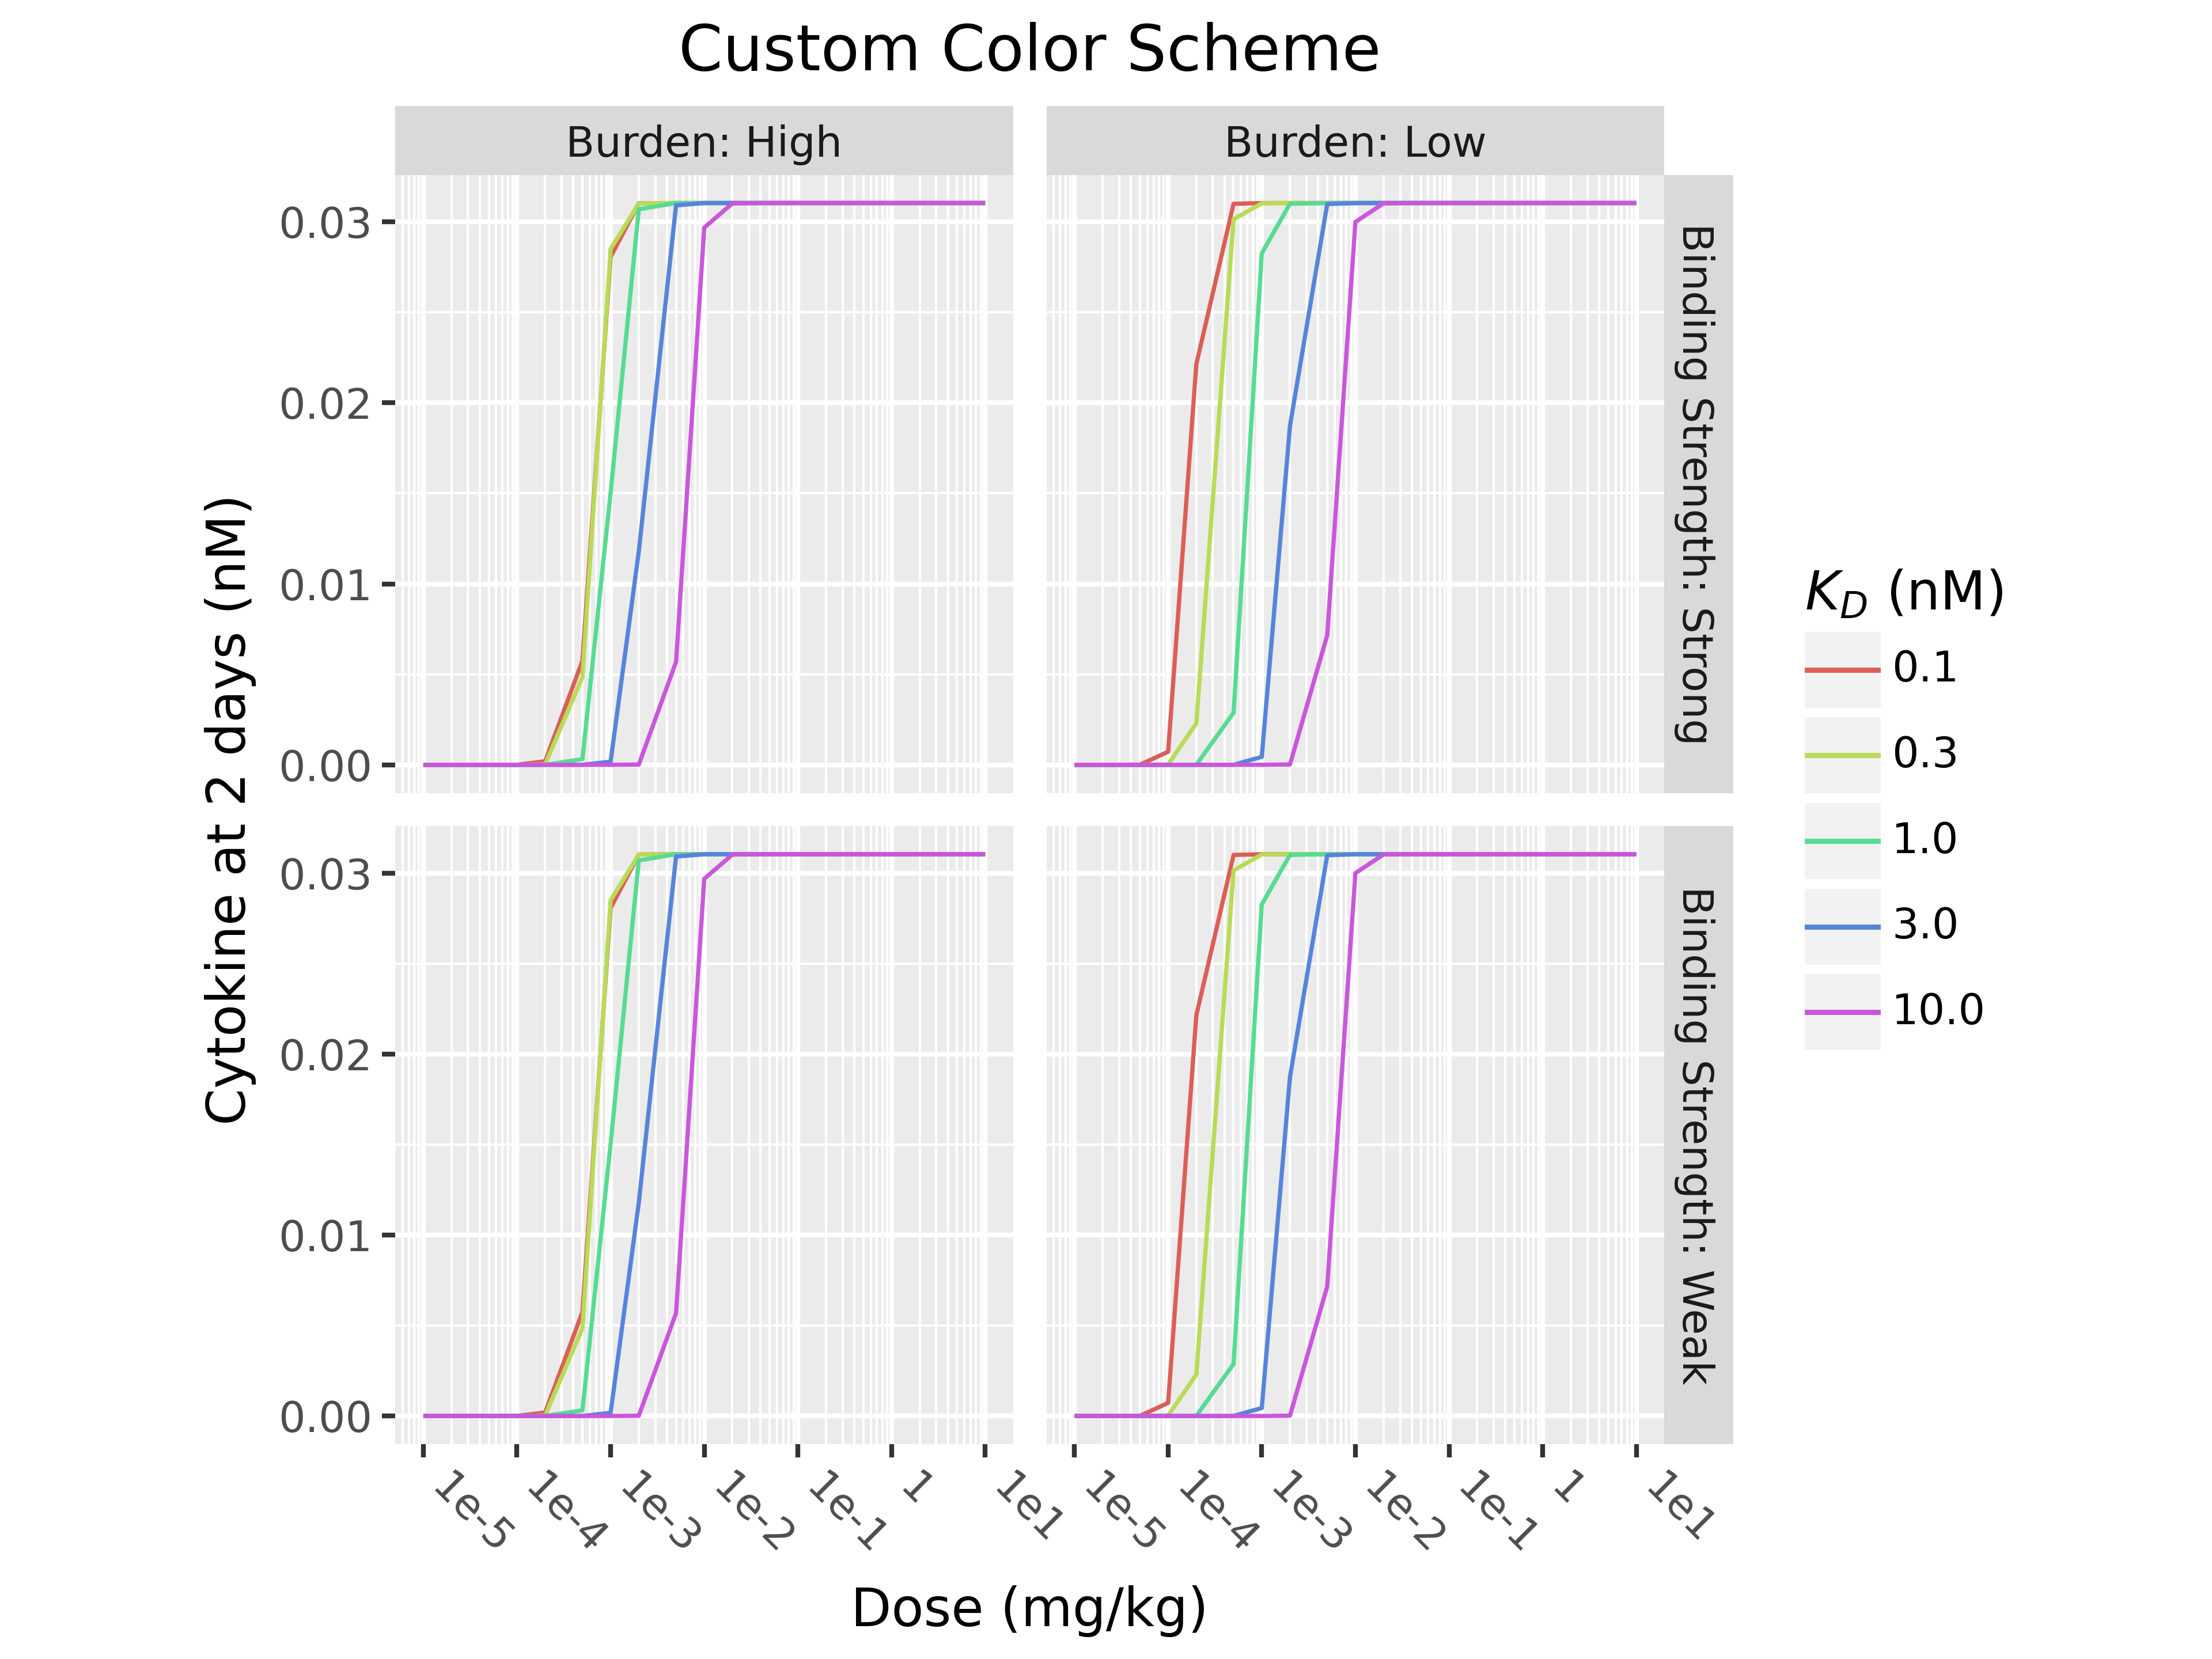

In [17]:
fig = (ggplot()
       + geom_line(Tscan, aes('dose_mpk', 'value', color='factor(scan_0_value)'))
       + facet_grid('binding_strength ~ burden', labeller = label_dict)
       + scale_x_log10(breaks = 10.**np.arange(-5,2))
       + labs(x = 'Dose (mg/kg)', y = 'Cytokine at 2 days (nM)', color = '$K_D$ (nM)')
       + theme(aspect_ratio = 1, dpi = 300, axis_text_x=element_text(rotation=-45, ha = 'left'), panel_spacing = 0.015)
       + ggtitle('Custom Color Scheme')
)

display(fig)